In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

# 1. 데이터 불러오기
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# 2. 독립변수/종속변수 분리
X = df.drop(columns=["NObeyesdad", "Height", "Weight"])
y = df["NObeyesdad"]

# 3. 범주형 변수 지정
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

# 4. 학습/테스트 데이터 분할(75:25, 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
# # 5. 기본 모델 설정
# model = CatBoostClassifier(
#     loss_function="MultiClass",
#     eval_metric="Accuracy",
#     verbose=0,
#     random_seed=42,
#     thread_count=-1,
#     cat_features=cat_features
# )

# # 6. 그리드 서치 파라미터
# param_grid = {
#     "learning_rate": [0.03, 0.1],
#     "depth": [4, 6, 10],
#     "l2_leaf_reg": [1, 3, 5, 7, 9]
# }

# # 7. GridSearchCV 실행
# grid = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring="accuracy",
#     cv=3,
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# # 8. 최적 하이퍼파라미터 & 성능 출력
# print("Best Parameters:", grid.best_params_)
# print("Best CV Accuracy:", grid.best_score_)

In [ ]:
# # Best Parameters: {'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
# # Best CV Accuracy: 0.8237618116650375

# # 9. 최적 모델로 테스트 데이터 평가
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# 최적의 하이퍼파라미터 적용
best_model = CatBoostClassifier(
    depth=6,
    l2_leaf_reg=1,
    learning_rate=0.1,
    random_seed=42,
    thread_count=-1,
    cat_features=cat_features
)

# 모델 학습 및 테스트 데이터 평가
best_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

0:	learn: 1.7736202	test: 1.7838471	best: 1.7838471 (0)	total: 104ms	remaining: 1m 43s
1:	learn: 1.6623300	test: 1.6755512	best: 1.6755512 (1)	total: 158ms	remaining: 1m 18s
2:	learn: 1.5712511	test: 1.5939128	best: 1.5939128 (2)	total: 207ms	remaining: 1m 8s
3:	learn: 1.4831462	test: 1.5104842	best: 1.5104842 (3)	total: 266ms	remaining: 1m 6s
4:	learn: 1.4127558	test: 1.4430851	best: 1.4430851 (4)	total: 314ms	remaining: 1m 2s
5:	learn: 1.3692481	test: 1.4025195	best: 1.4025195 (5)	total: 361ms	remaining: 59.7s
6:	learn: 1.3209955	test: 1.3538664	best: 1.3538664 (6)	total: 426ms	remaining: 1m
7:	learn: 1.2886143	test: 1.3258387	best: 1.3258387 (7)	total: 466ms	remaining: 57.7s
8:	learn: 1.2406074	test: 1.2811656	best: 1.2811656 (8)	total: 511ms	remaining: 56.3s
9:	learn: 1.2127292	test: 1.2582158	best: 1.2582158 (9)	total: 555ms	remaining: 55s
10:	learn: 1.1763258	test: 1.2297291	best: 1.2297291 (10)	total: 598ms	remaining: 53.7s
11:	learn: 1.1487508	test: 1.2067364	best: 1.2067364 (1

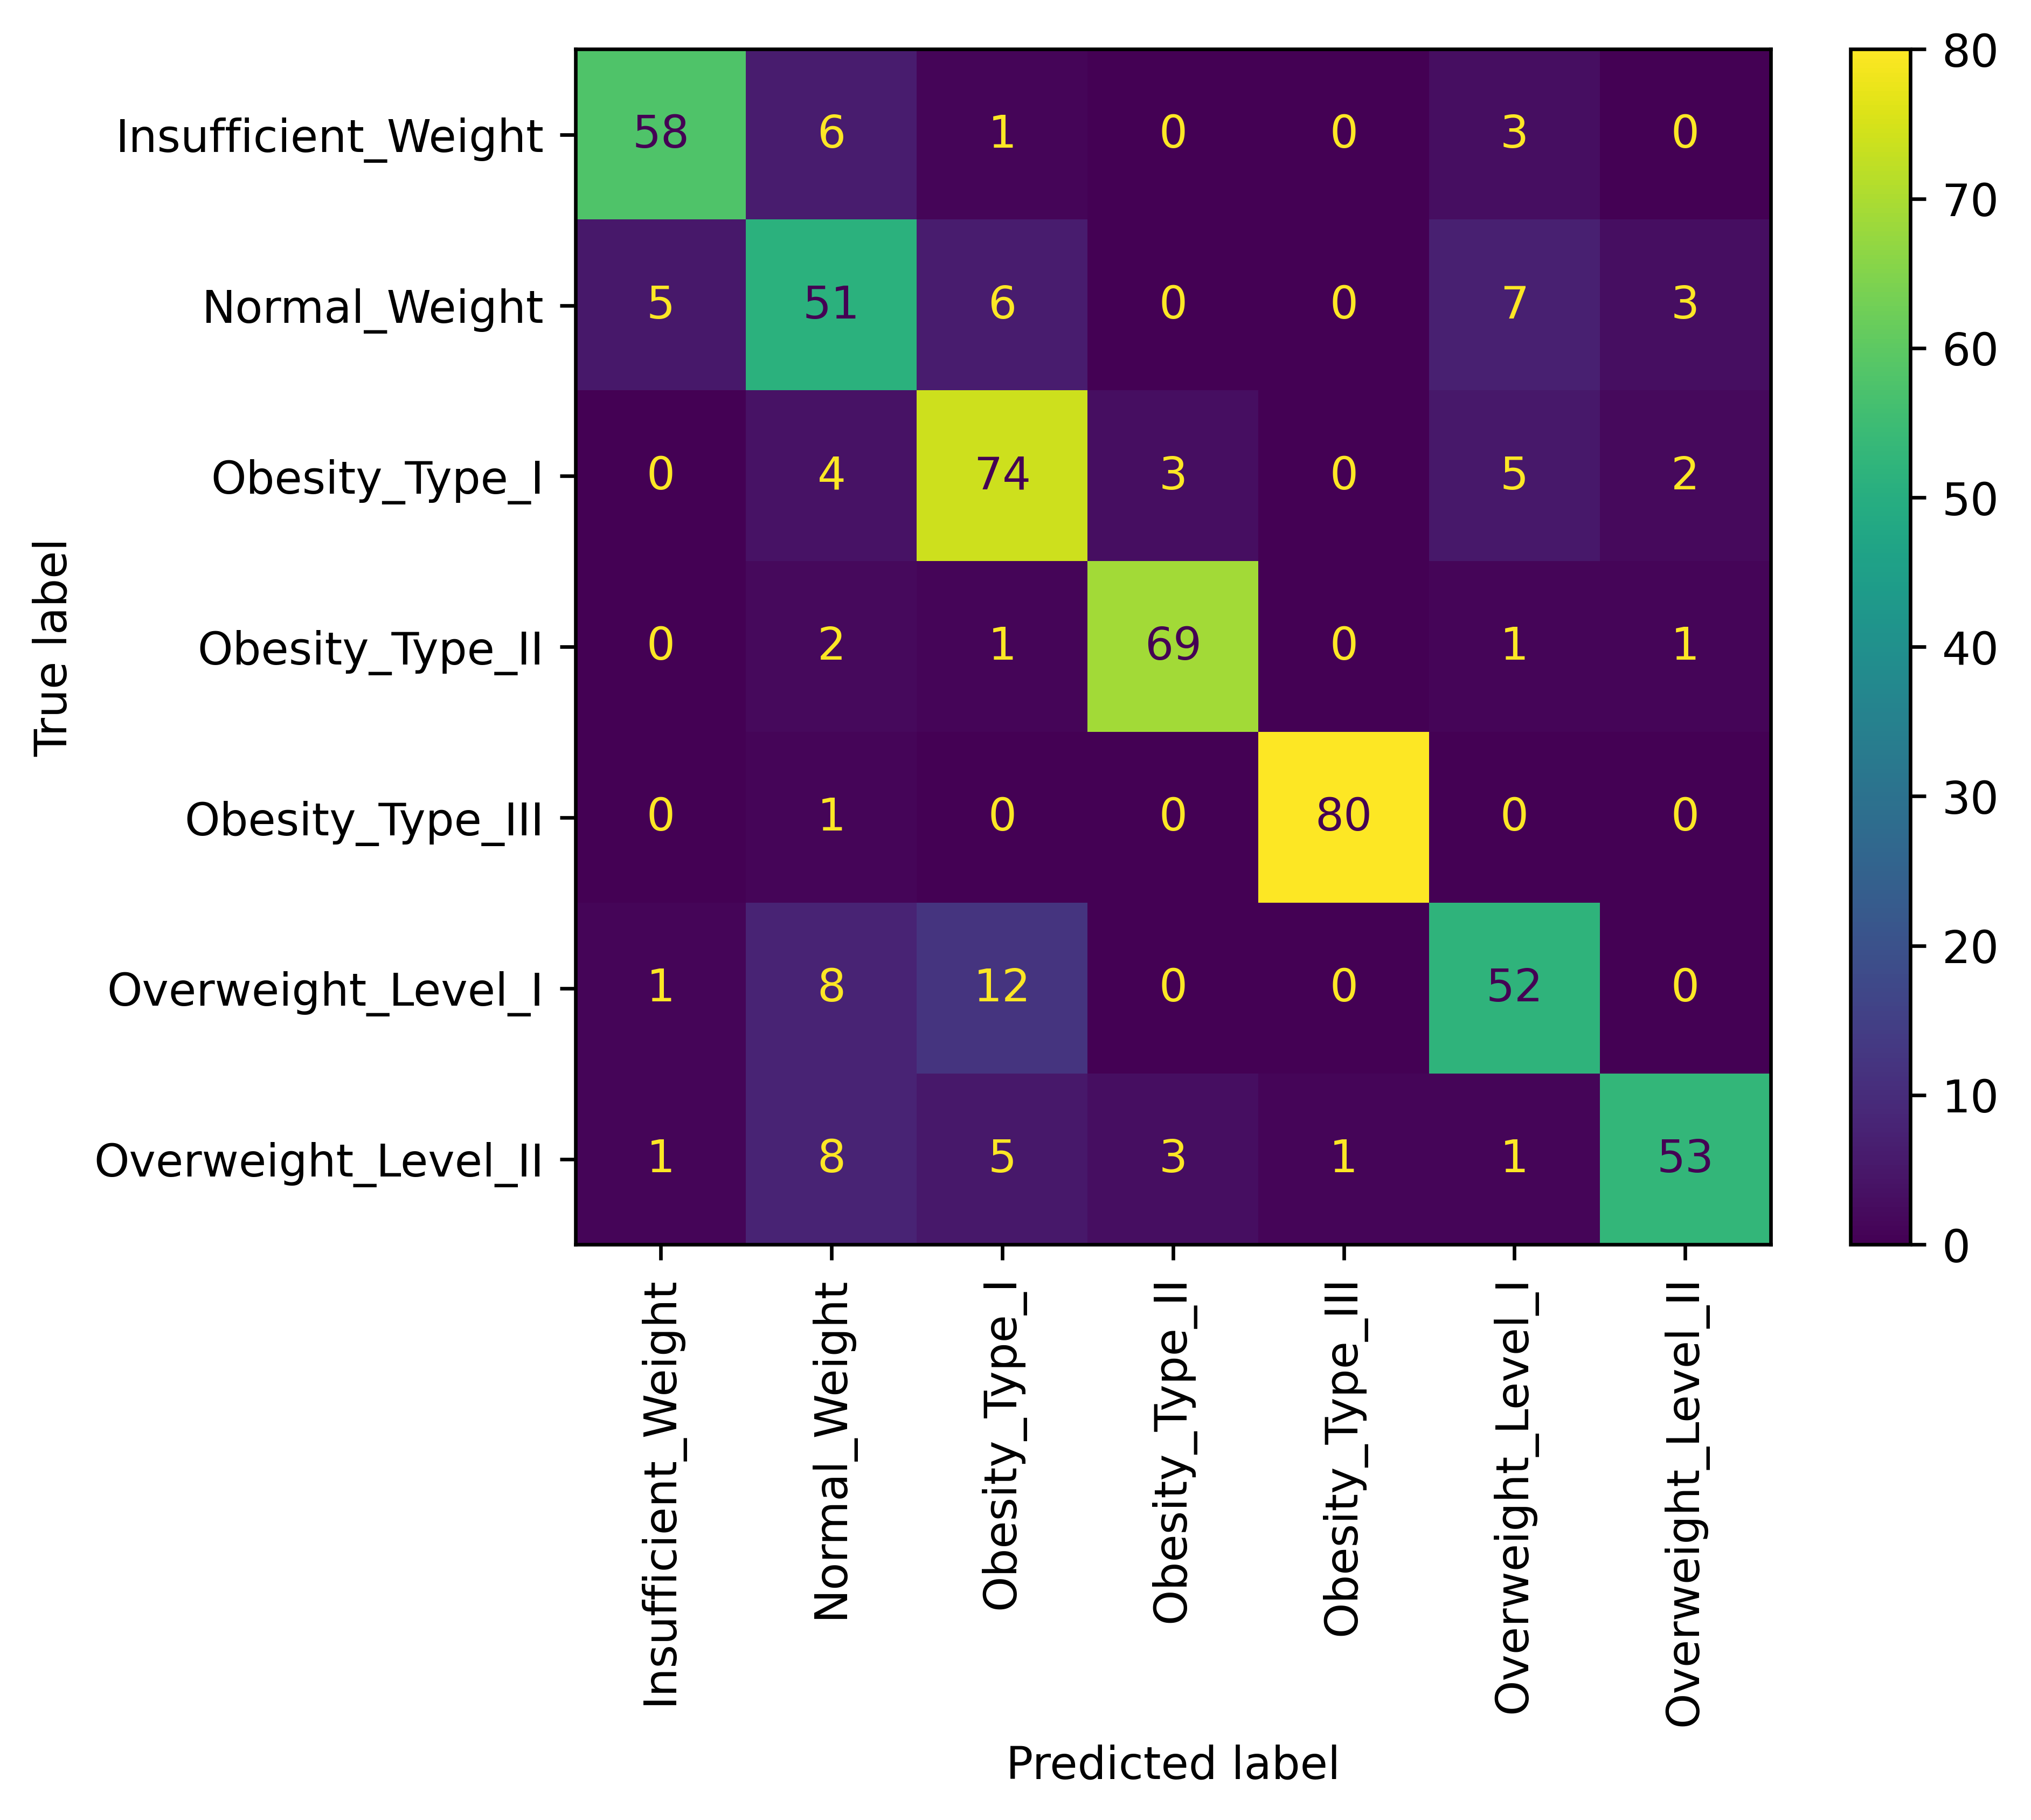

In [ ]:
# 10. 혼동행렬 출력
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="viridis", xticks_rotation=90)
plt.show()

### 결과 해석
- 대각선: 행렬의 대각선에 위치한 숫자는 모델이 정확하게 분류한 샘플의 개수를 나타냄. 대각선의 값이 높을수록 좋음
- 대각선 외: 대각선 외의 값은 모델이 잘못 분류(오류)한 샘플의 개수를 나타냄

- 특징
    - 오분류가 많은 비만 유형을 빠르게 파악 가능

### 필요한 변수만 사용해서 만든 변수중요도 shap

Test Accuracy: 0.8371212121212122
클래스 목록: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
=== Obesity_Type_I (index=2) ===


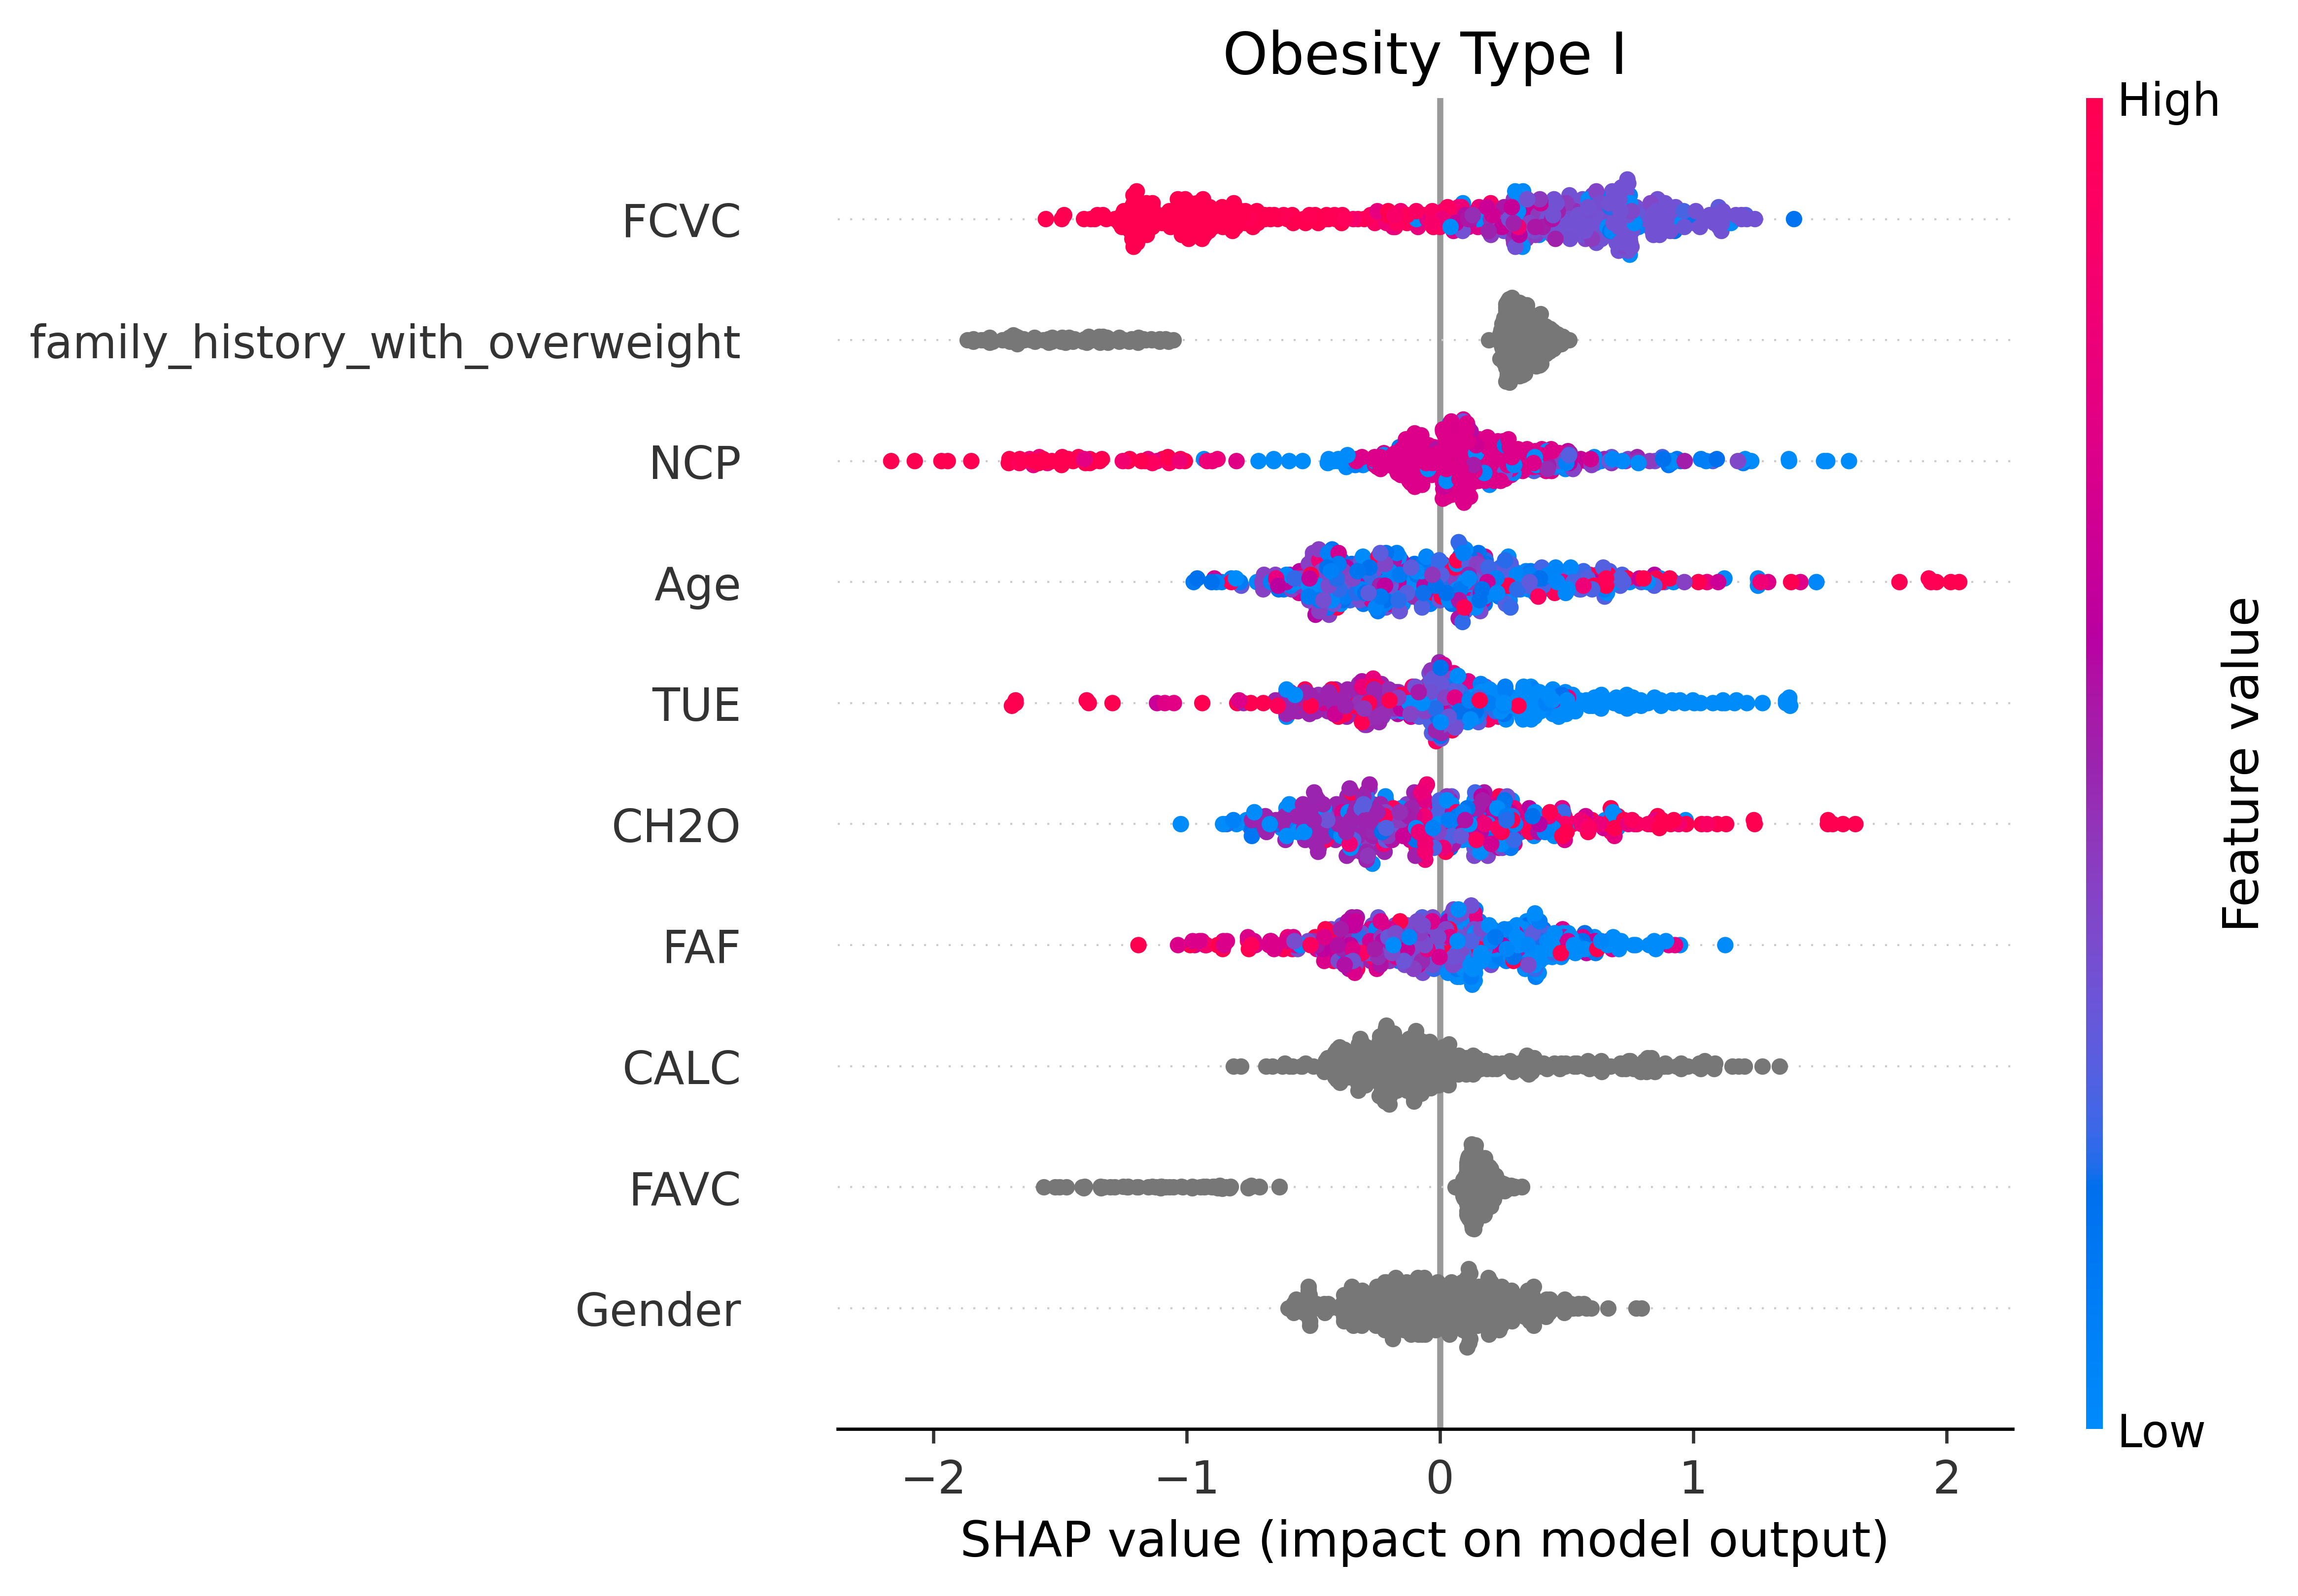

=== Obesity_Type_II (index=3) ===


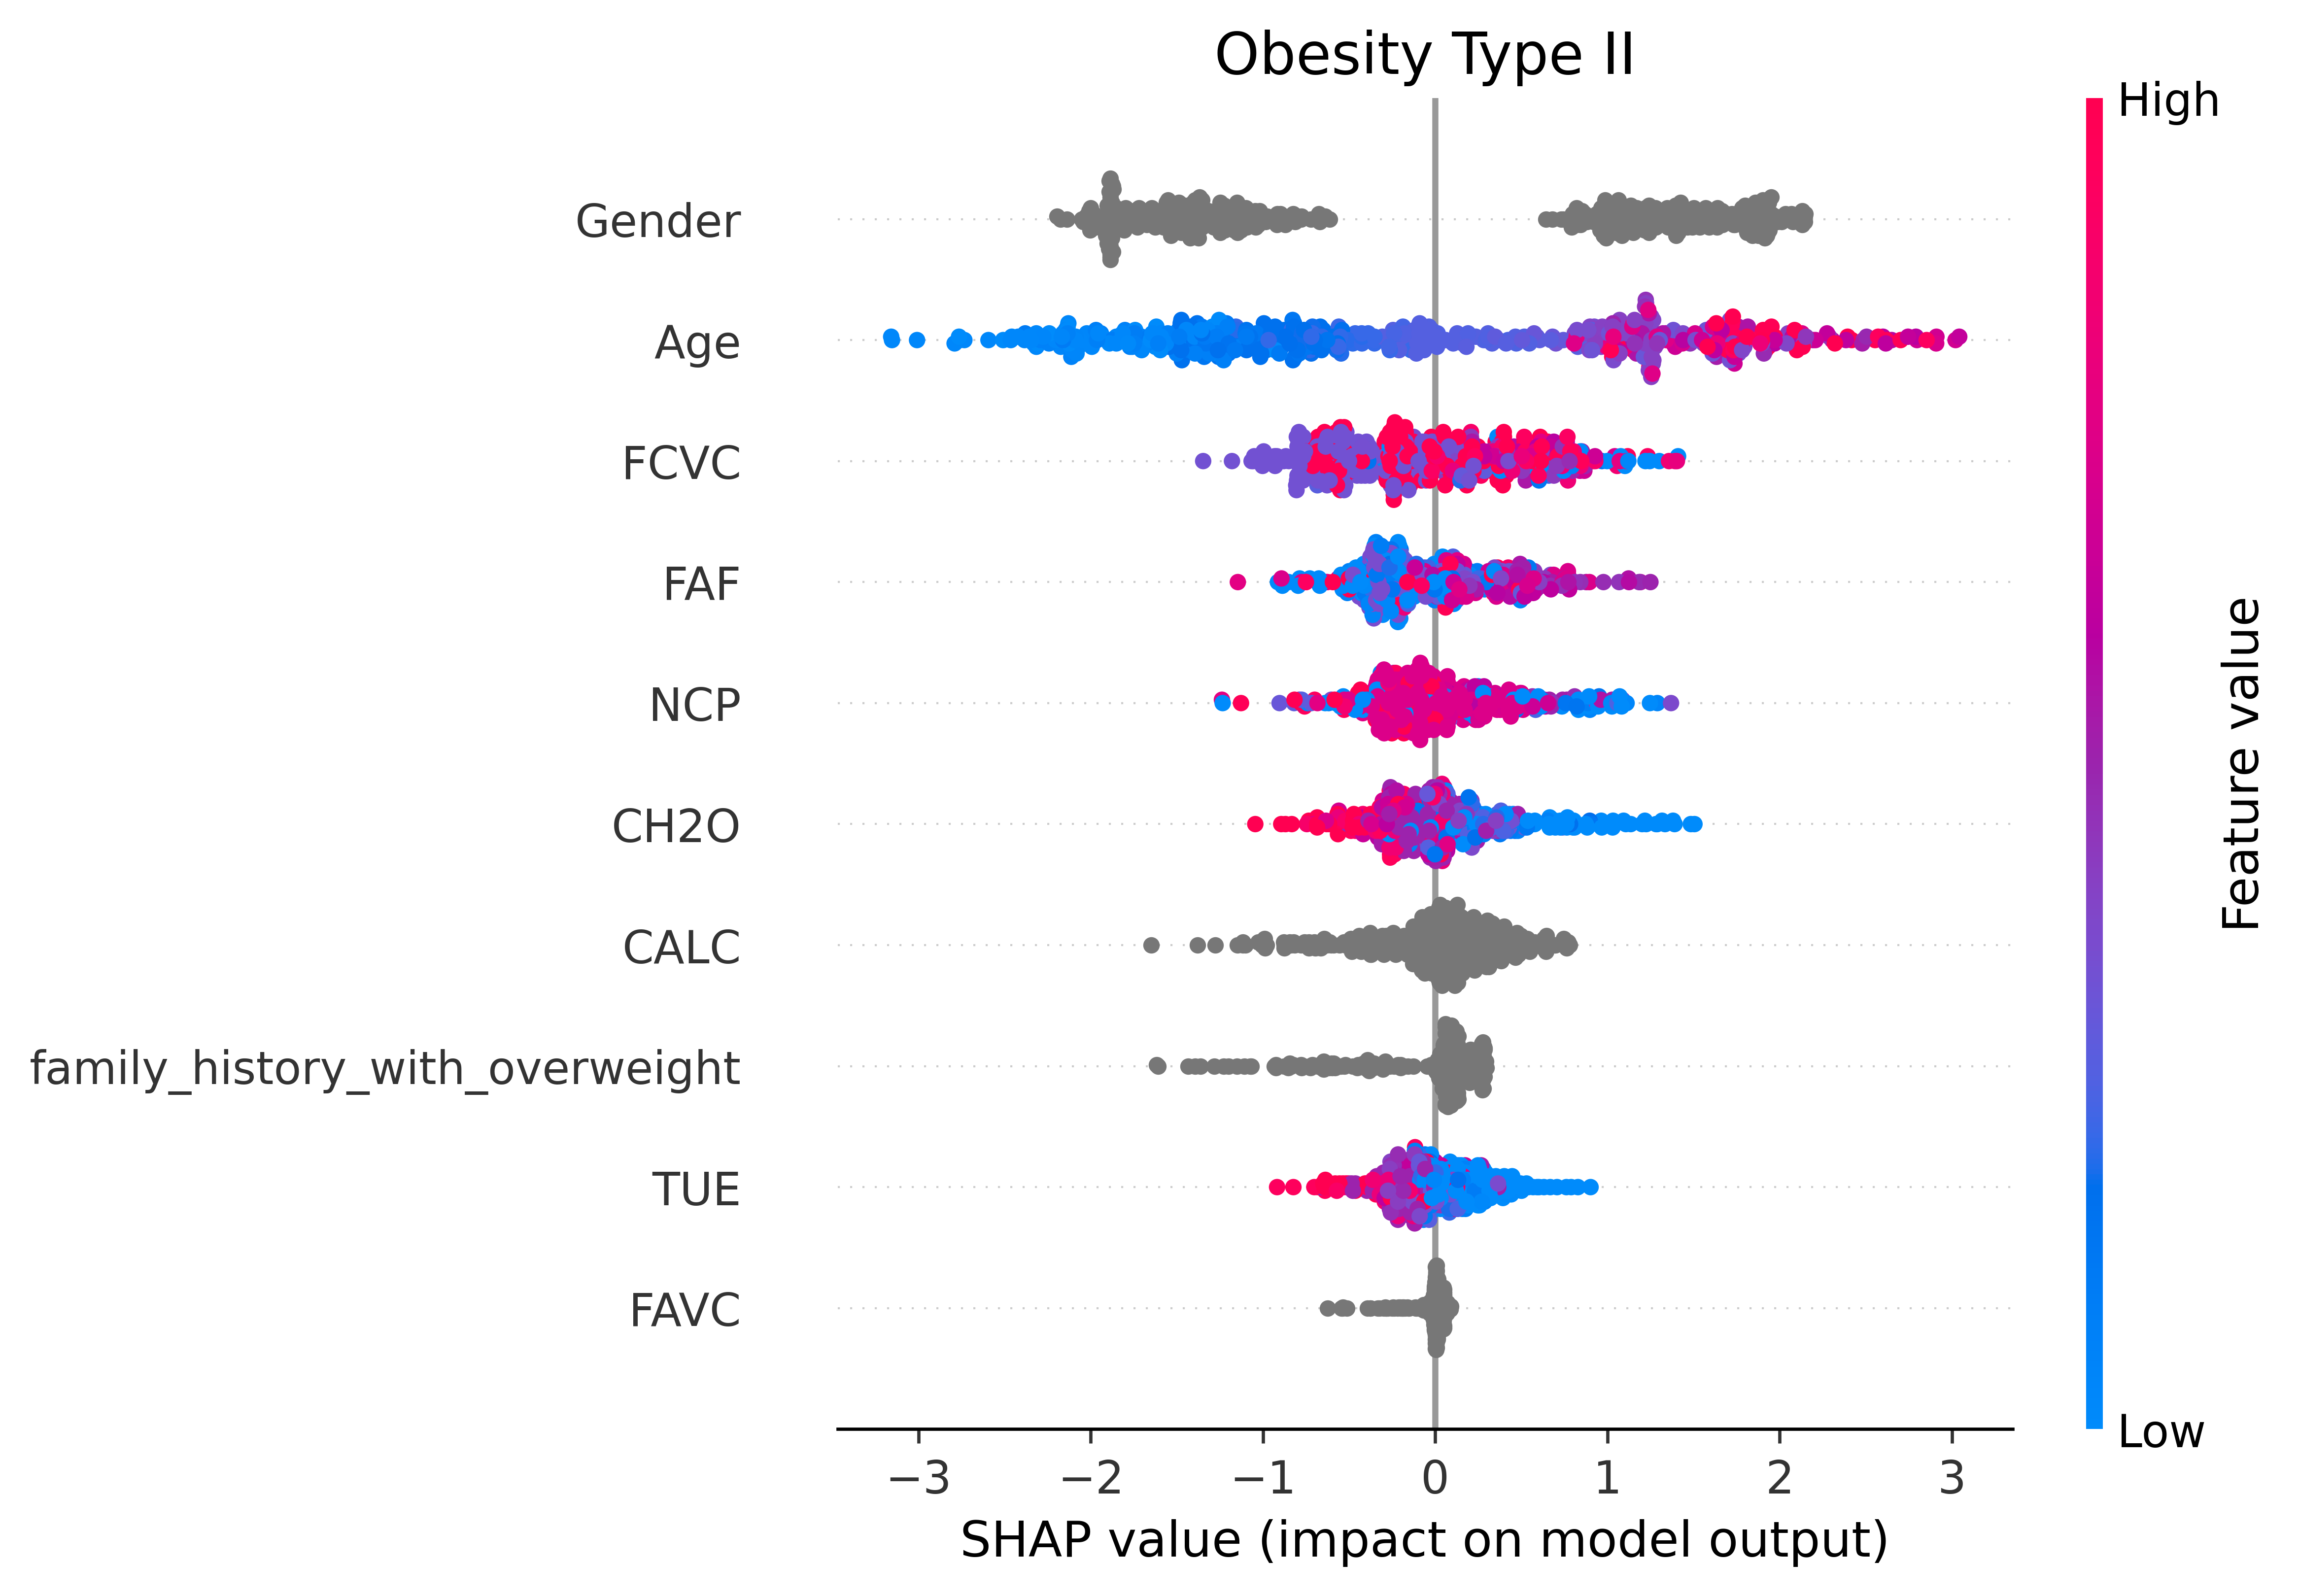

=== Obesity_Type_III (index=4) ===


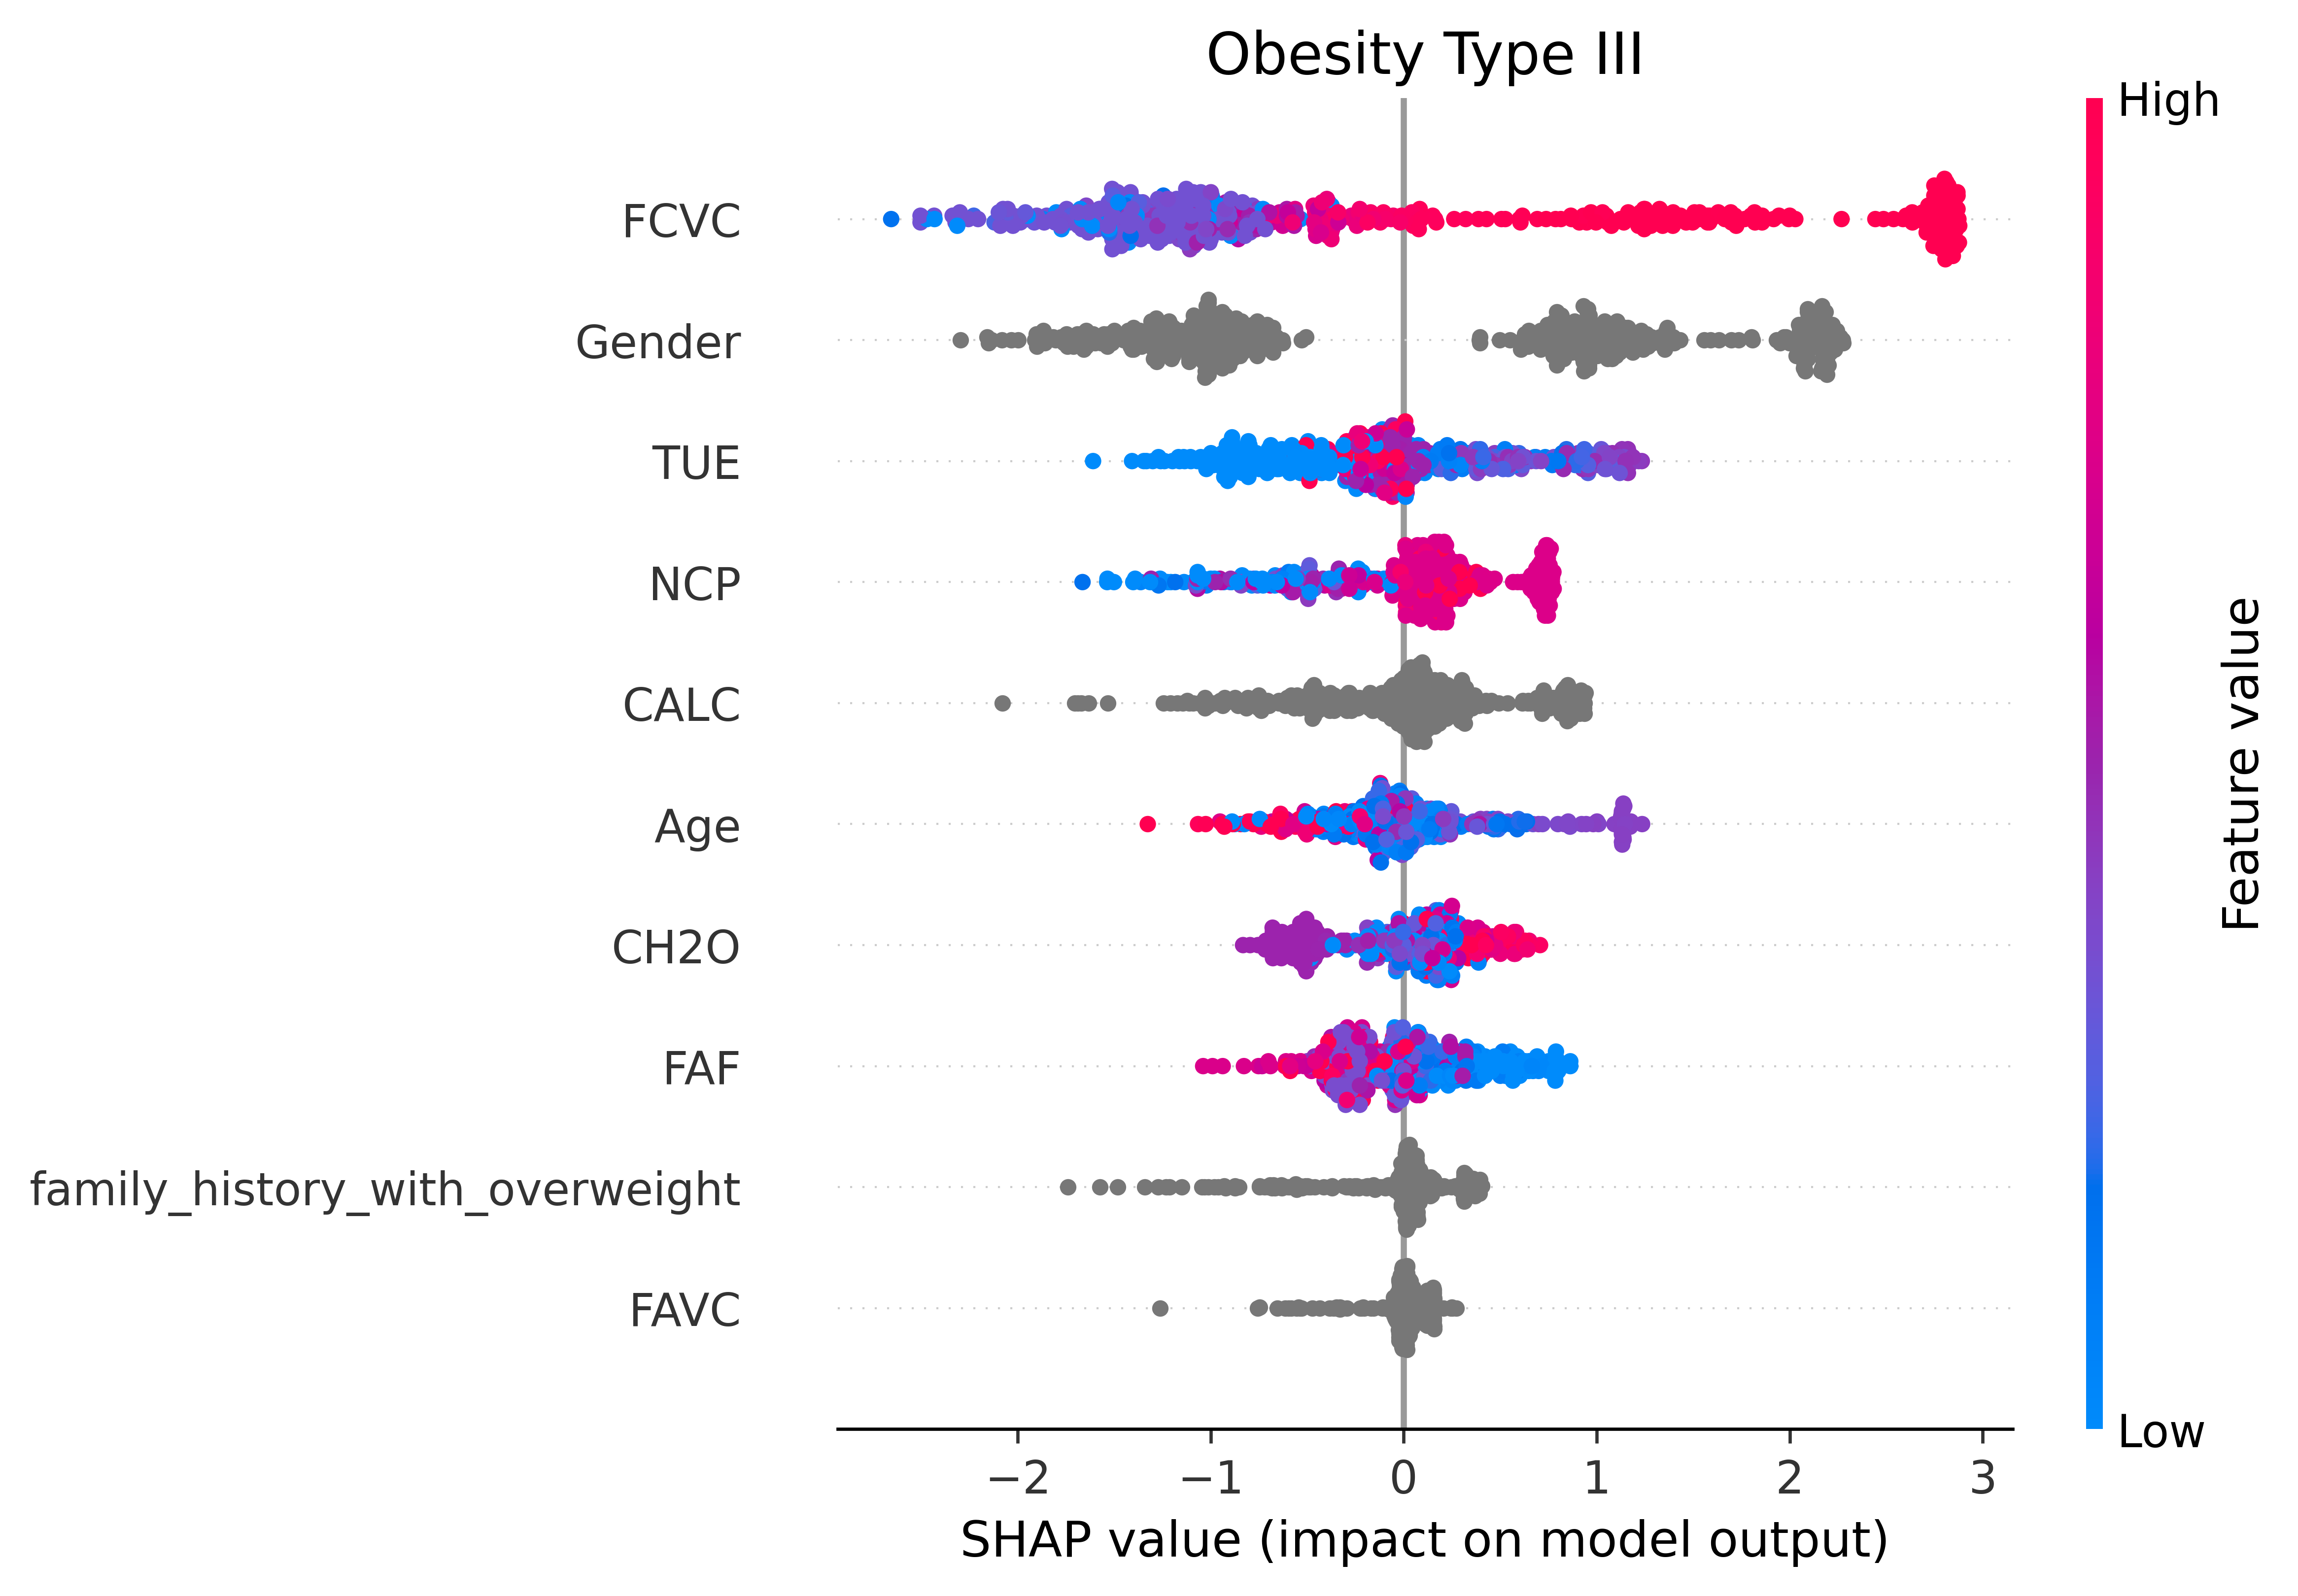

In [ ]:
### 필요한 변수만 사용해서 다시 만든 shap 변수중요도

# === 라이브러리 불러오기 ===
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# === 1. 데이터 불러오기 ===
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# === 2. 사용할 변수 선택 (10개) ===
selected = [
    "family_history_with_overweight",
    "FAVC",
    "FCVC",
    "NCP",
    "CH2O",
    "FAF",
    "TUE",
    "CALC",
    "Age",
    "Gender"
]
target = "NObeyesdad"

X = df[selected].copy()
y = df[target].copy()

# === 3. 범주형 변수 지정 ===
cat_features = [c for c in ["family_history_with_overweight","FAVC","CALC","Gender"]
                if X[c].dtype == "object"]

# === 4. 학습/테스트 분할 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# === 5. CatBoost 모델 학습 (교수님 설정에 맞춤) ===
model = CatBoostClassifier(
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=1,
    random_seed=42,
    thread_count=-1,
    cat_features=cat_features,   # 생성자에도 명시 (일관성)
    verbose=False
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,   # fit에도 동일 전달
    eval_set=(X_test, y_test)
)

# === 6. 정확도 확인 ===
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# === 7. SHAP 값 계산 ===
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)  # shap.Explanation 객체

# === 8. 클래스 순서 확인 ===
classes = list(model.classes_)
print("클래스 목록:", classes)

# === 9. 비만 유형 클래스 선택 ===
obesity_classes = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

# === 10. 클래스별 변수 중요도 Beeswarm + 제목 ===
title_map = {
    "Obesity_Type_I":   "Obesity Type I",
    "Obesity_Type_II":  "Obesity Type II",
    "Obesity_Type_III": "Obesity Type III",
}

for cls in obesity_classes:
    idx = classes.index(cls)
    print(f"=== {cls} (index={idx}) ===")

    exp = shap.Explanation(
        values=shap_values.values[:, :, idx],
        base_values=shap_values.base_values[:, idx],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    )

    plt.figure(dpi=600)
    shap.plots.beeswarm(
        exp,
        max_display=len(selected),
        show=False
    )
    plt.title(title_map[cls], fontsize=14)
    plt.xlabel("SHAP value (impact on model output)", fontsize=12)
    plt.tick_params(axis="both", labelsize=11)
    plt.tight_layout()
    plt.show()

### 결과 설명

- 선택된 10개의 변수만 사용하여 CatBoost 모델을 재학습하고 비만 유형 3가지에 대한 SHAP Beeswarm Plot을 개별적으로 생성

###

In [ ]:
# beeswarm 그린 후 저장
plt.tight_layout()
plt.savefig("shap_beeswarm_obesity_typeI.png", dpi=600, bbox_inches='tight')
plt.close()

클래스 목록: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
=== Obesity_Type_I (index=2) ===


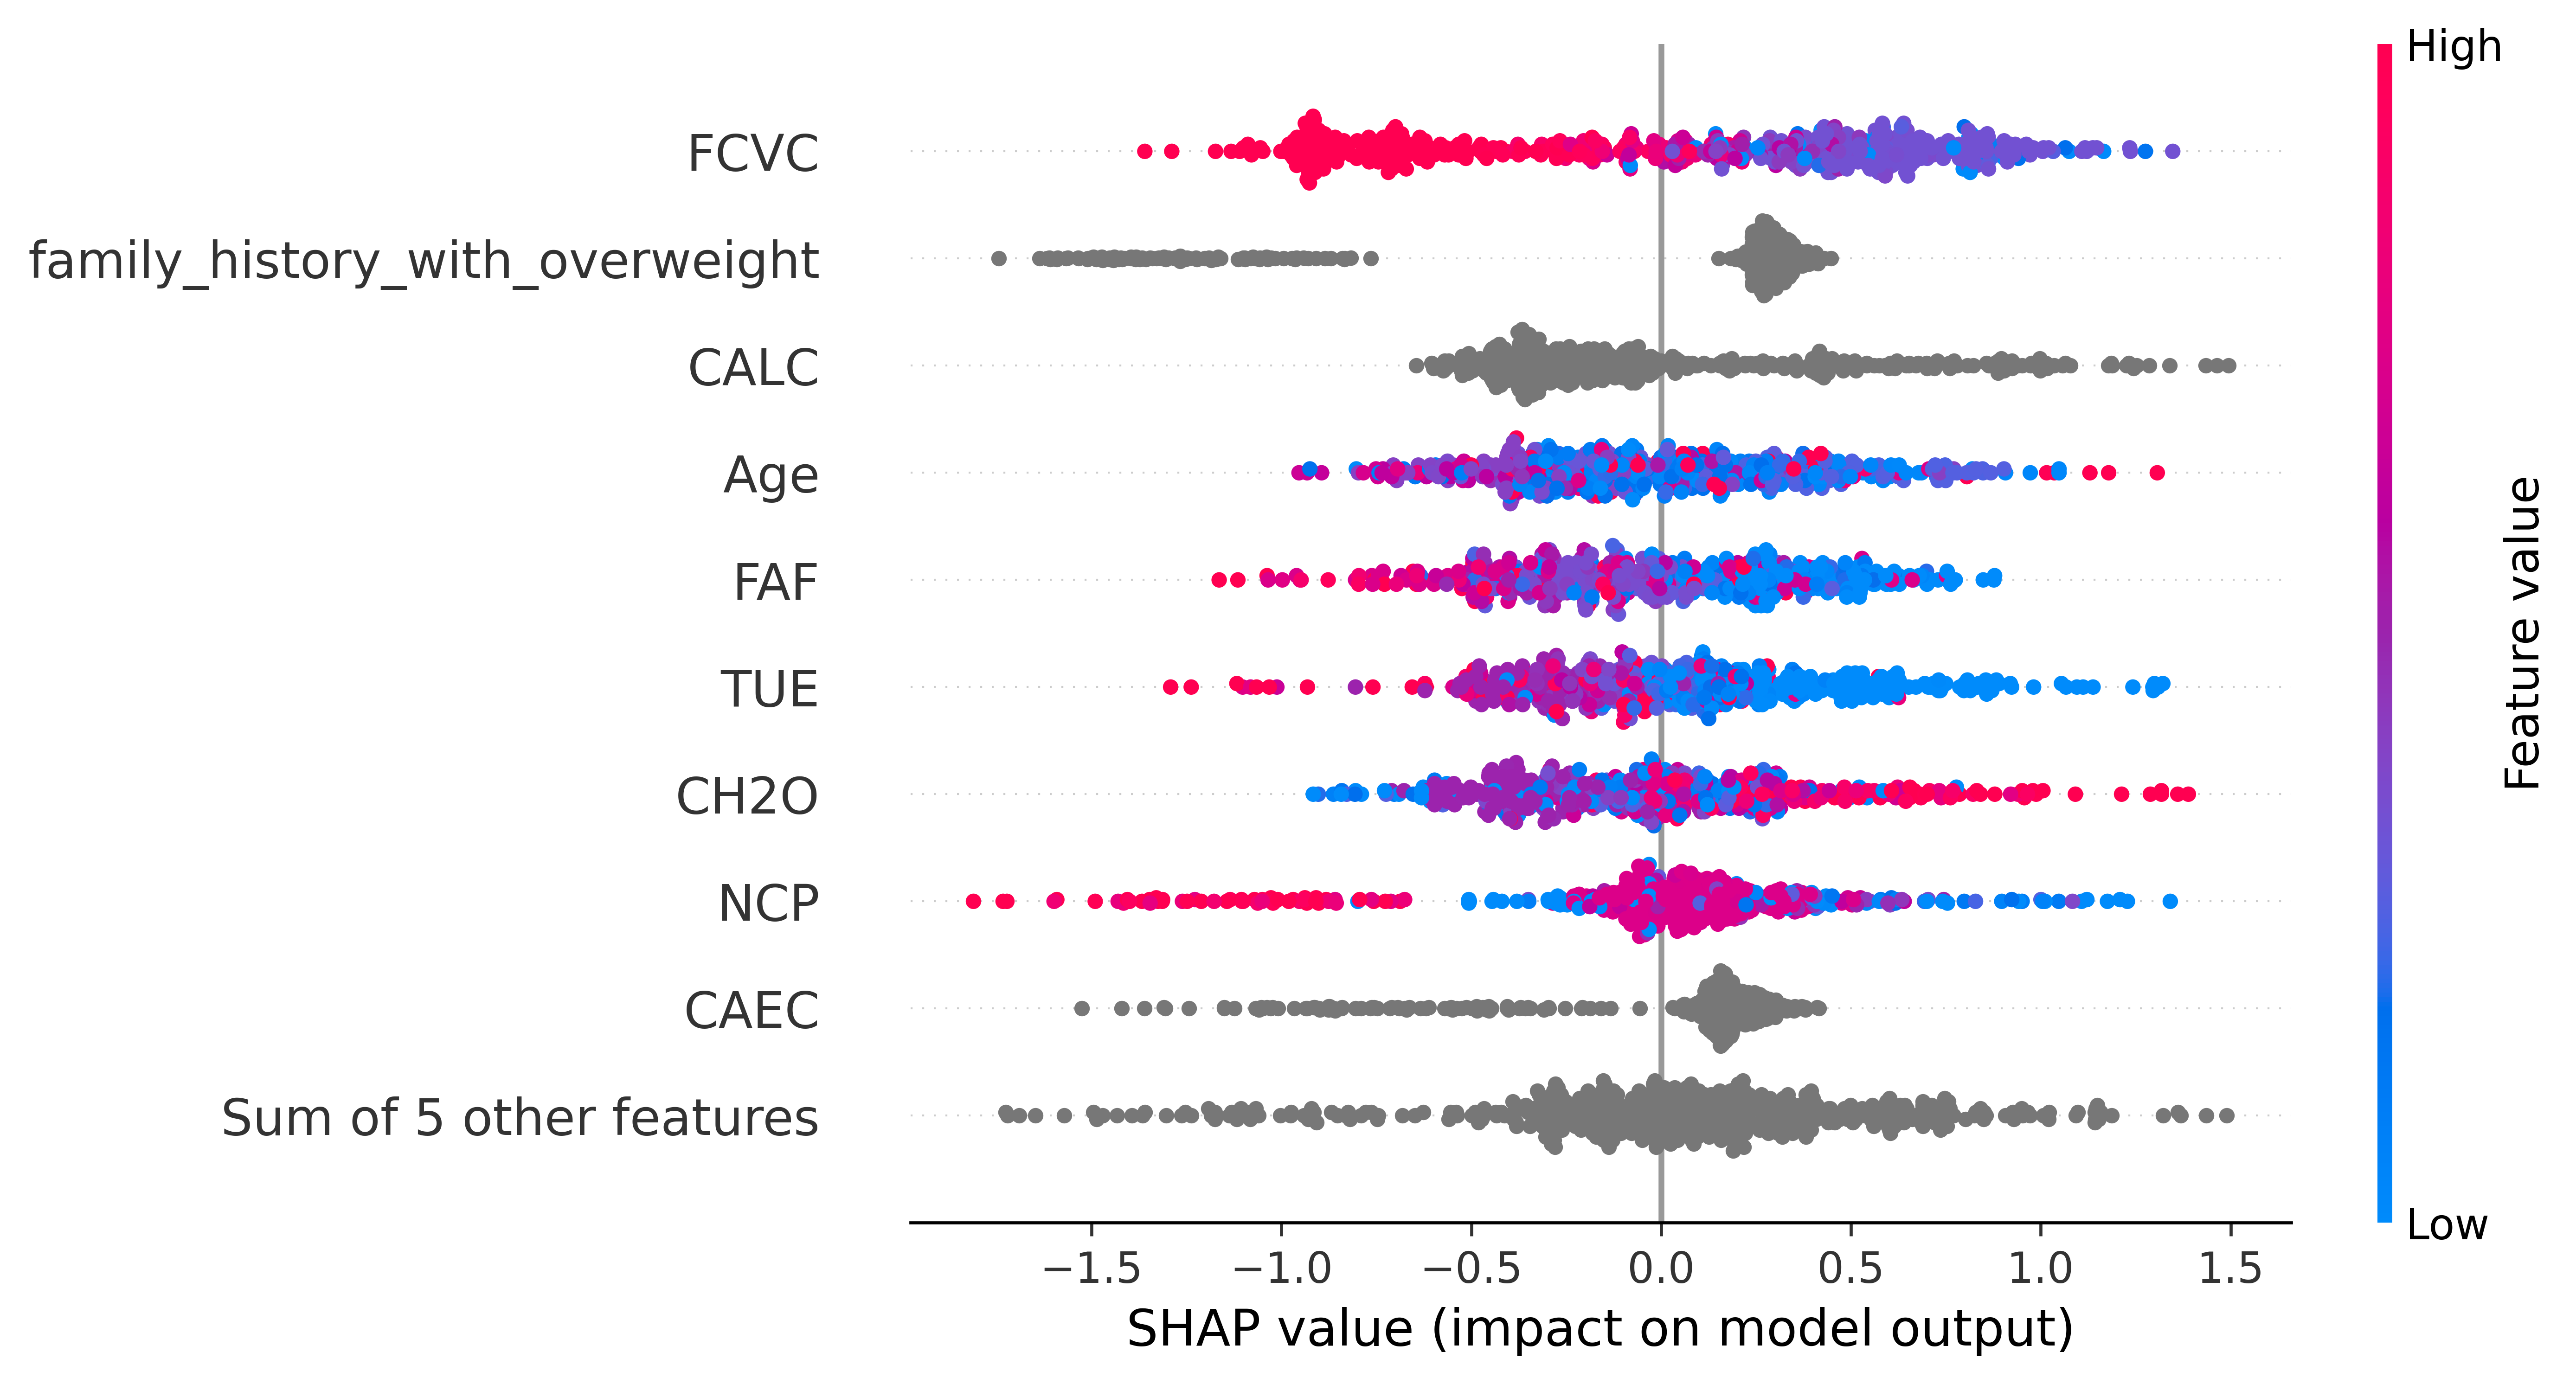

=== Obesity_Type_II (index=3) ===


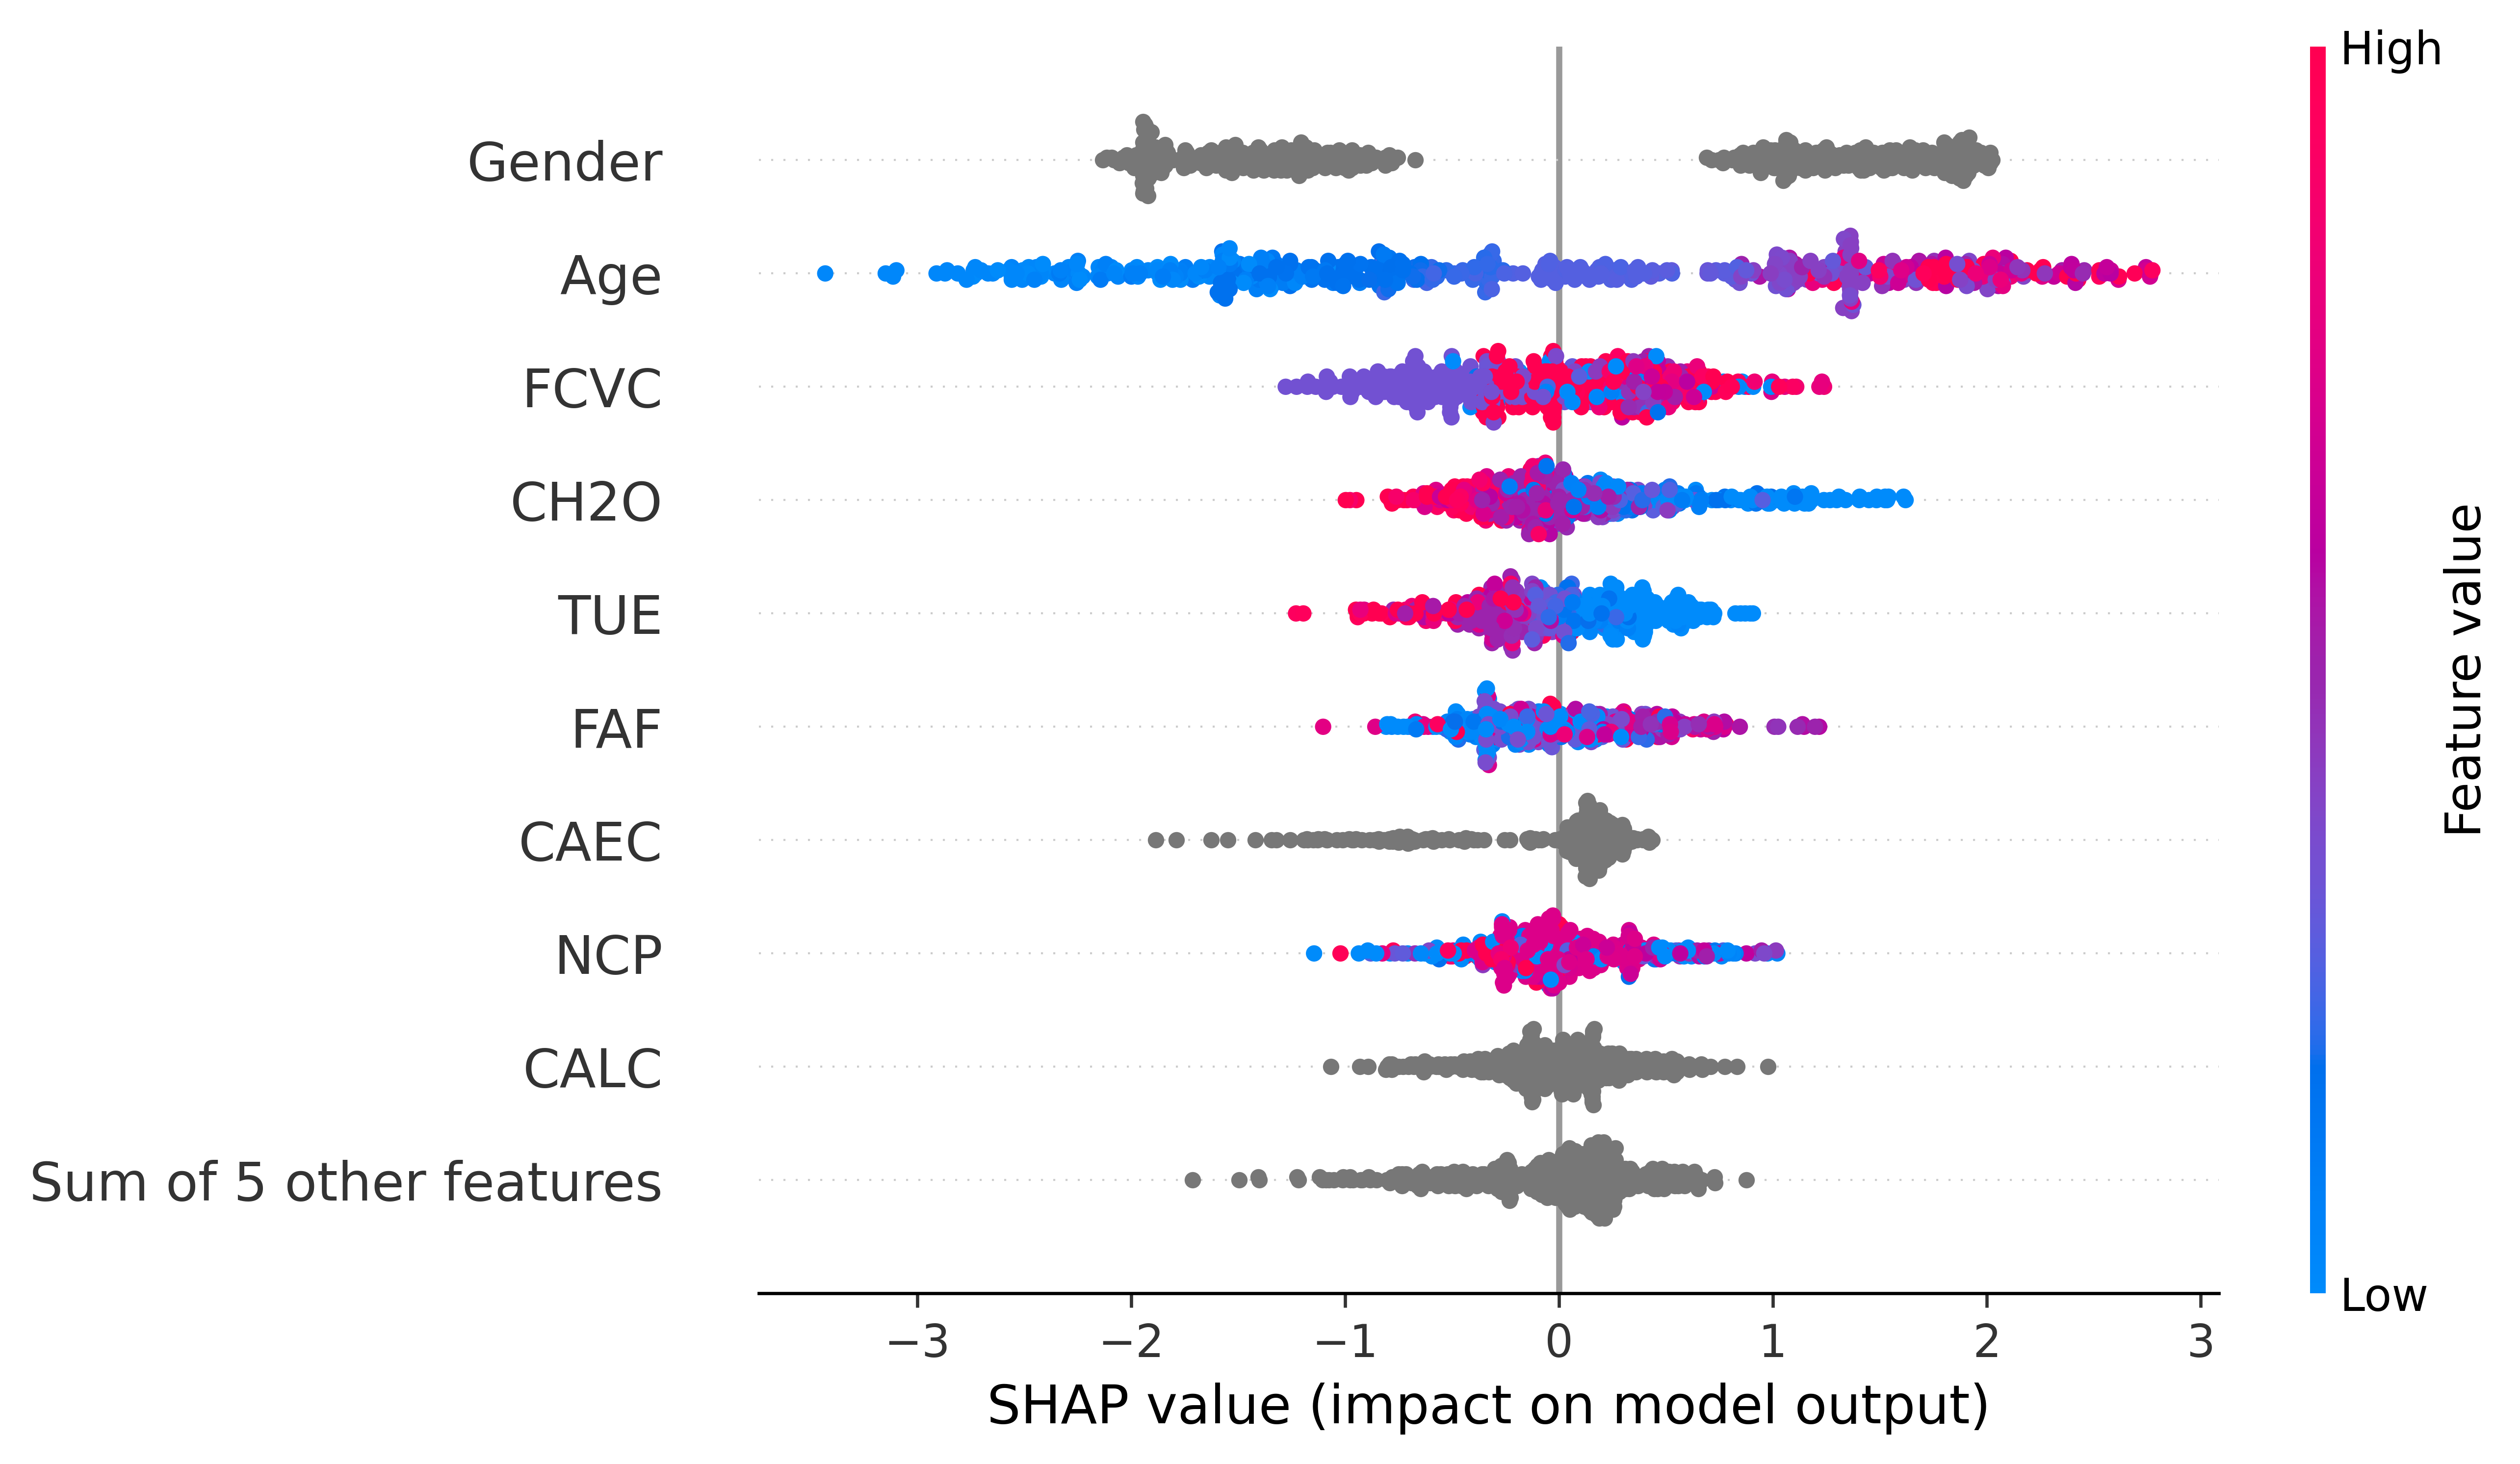

=== Obesity_Type_III (index=4) ===


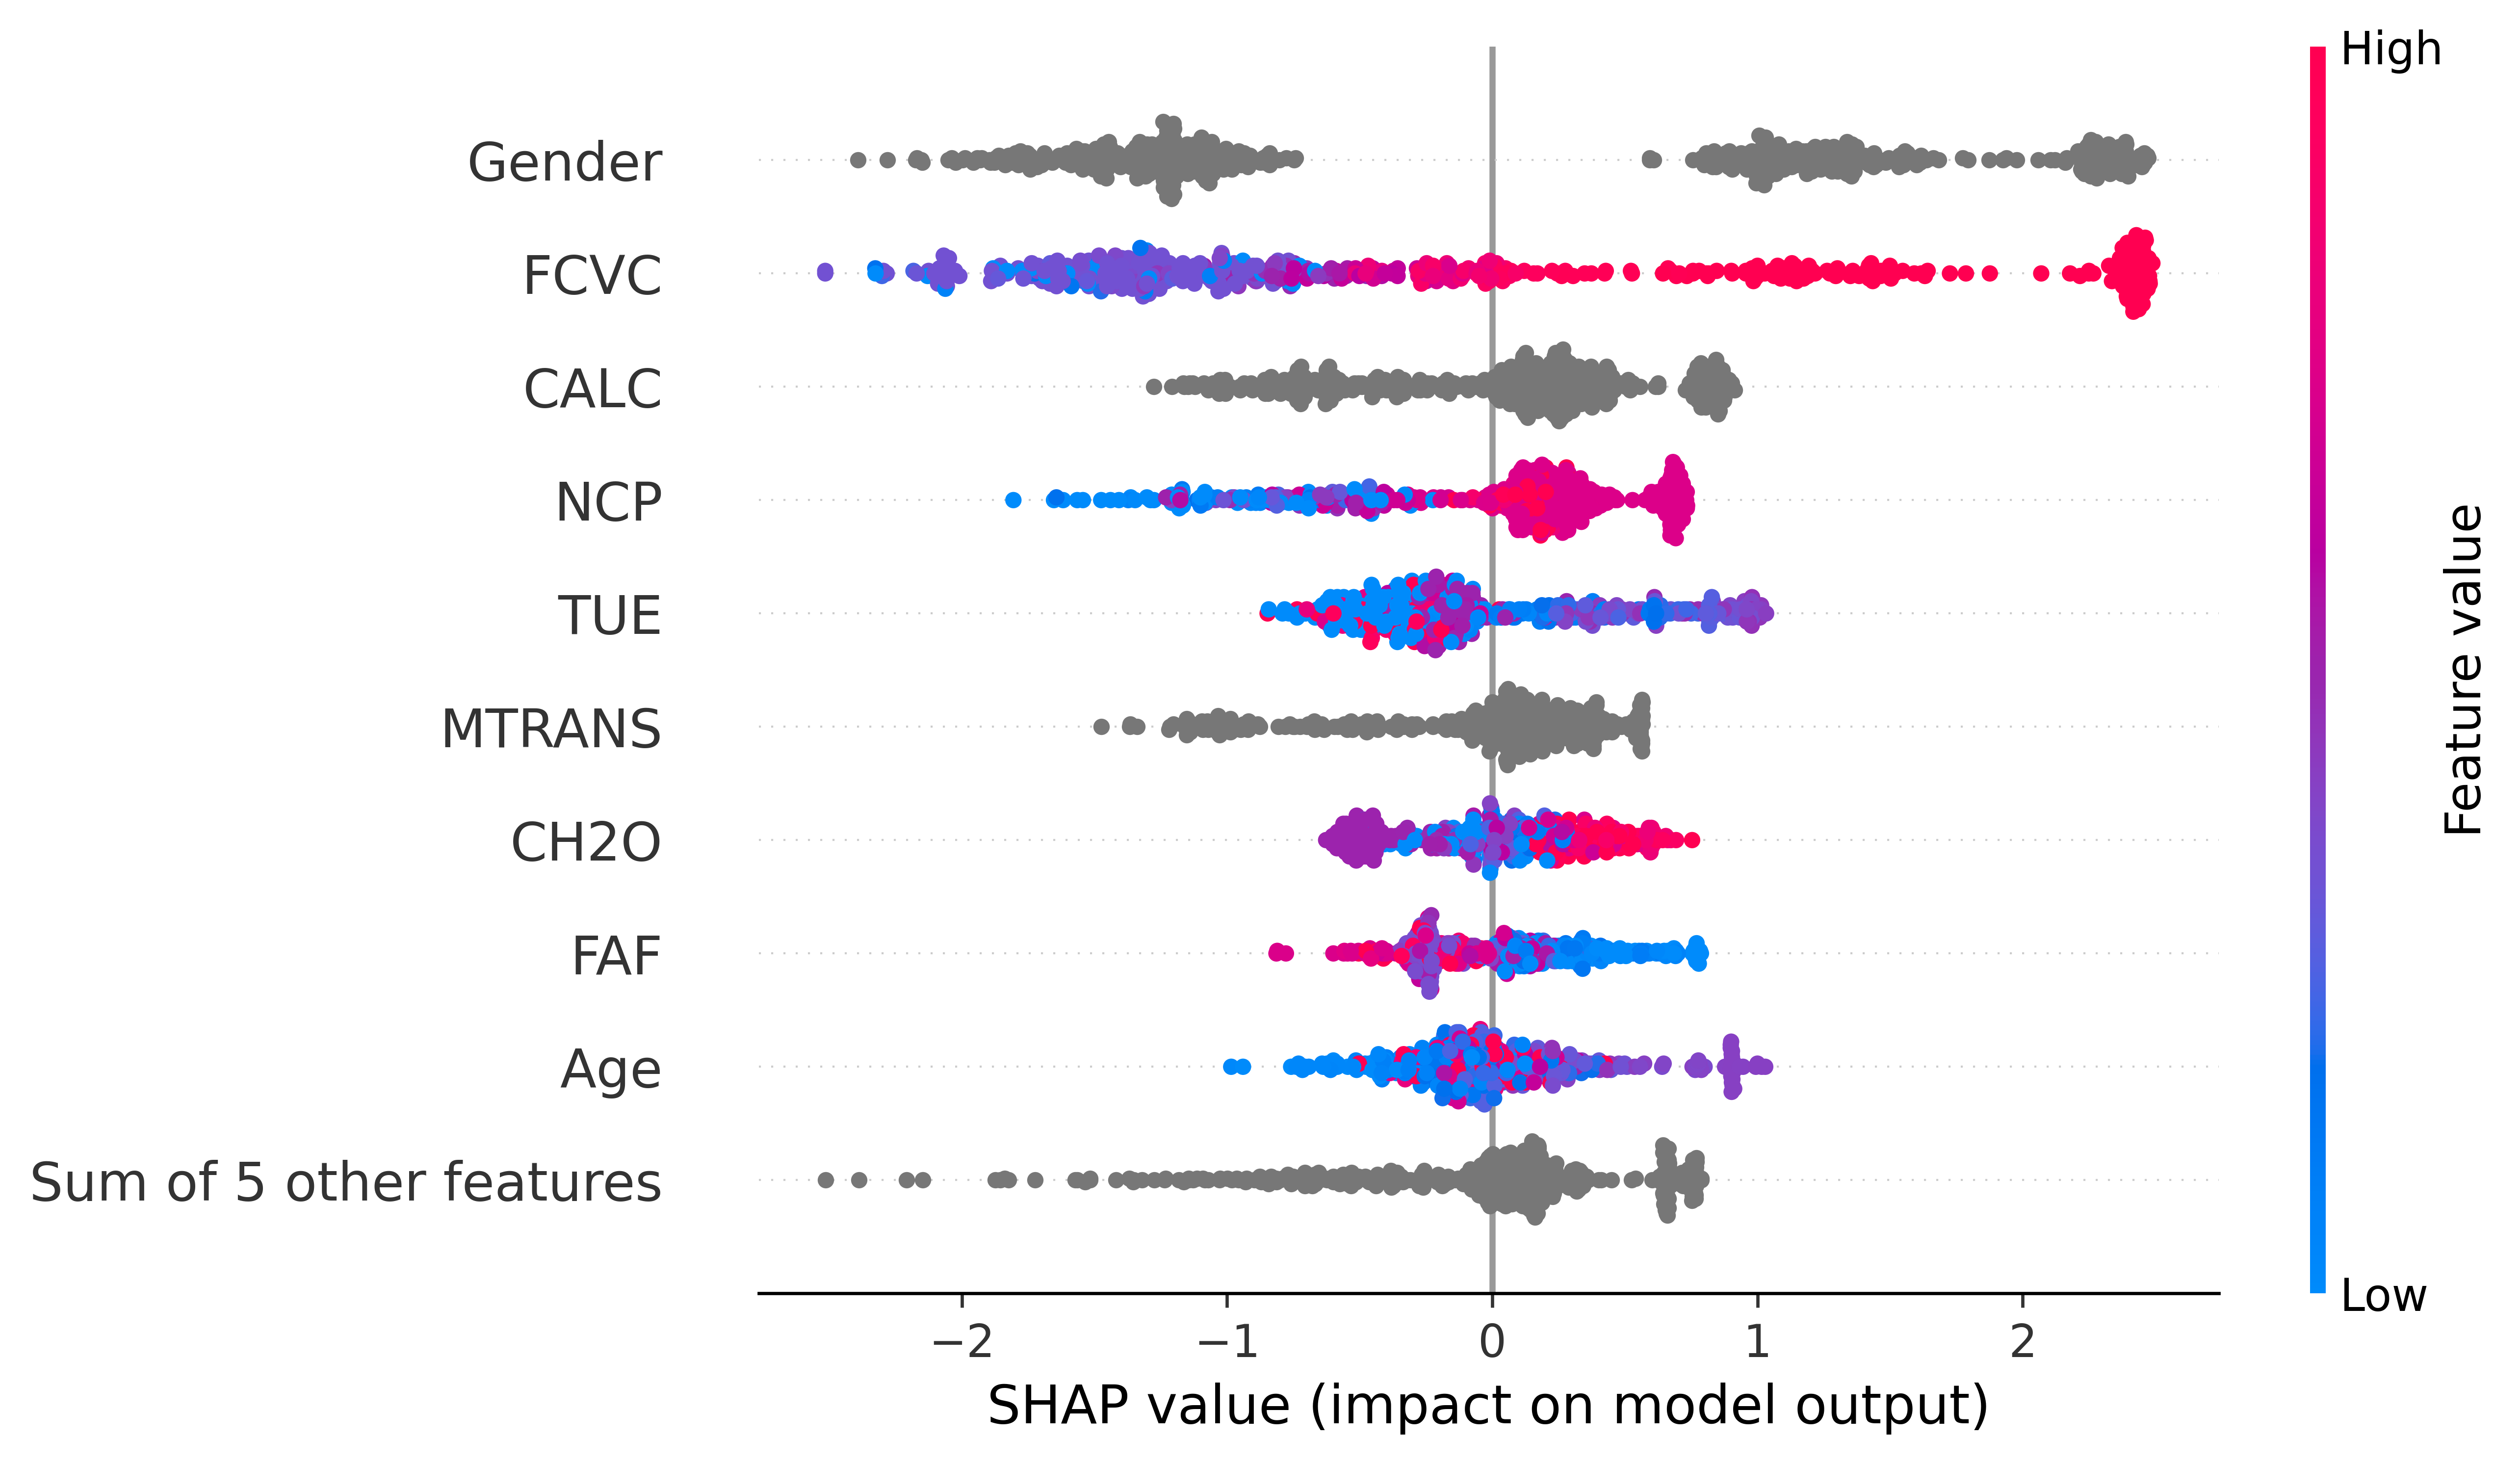

In [ ]:
classes = sorted(y_train.unique())   # 문자열 그대로 라벨 목록
print("클래스 목록:", classes)

# 2. 비만 유형 클래스 선택
obesity_classes = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

for cls in obesity_classes:
    idx = classes.index(cls)  # 해당 클래스 인덱스 찾기
    print(f"=== {cls} (index={idx}) ===")

    shap.plots.beeswarm(shap.Explanation(
        values=shap_values.values[:,:,idx],   # 특정 클래스 SHAP 값
        base_values=shap_values.base_values[:,idx],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    ))

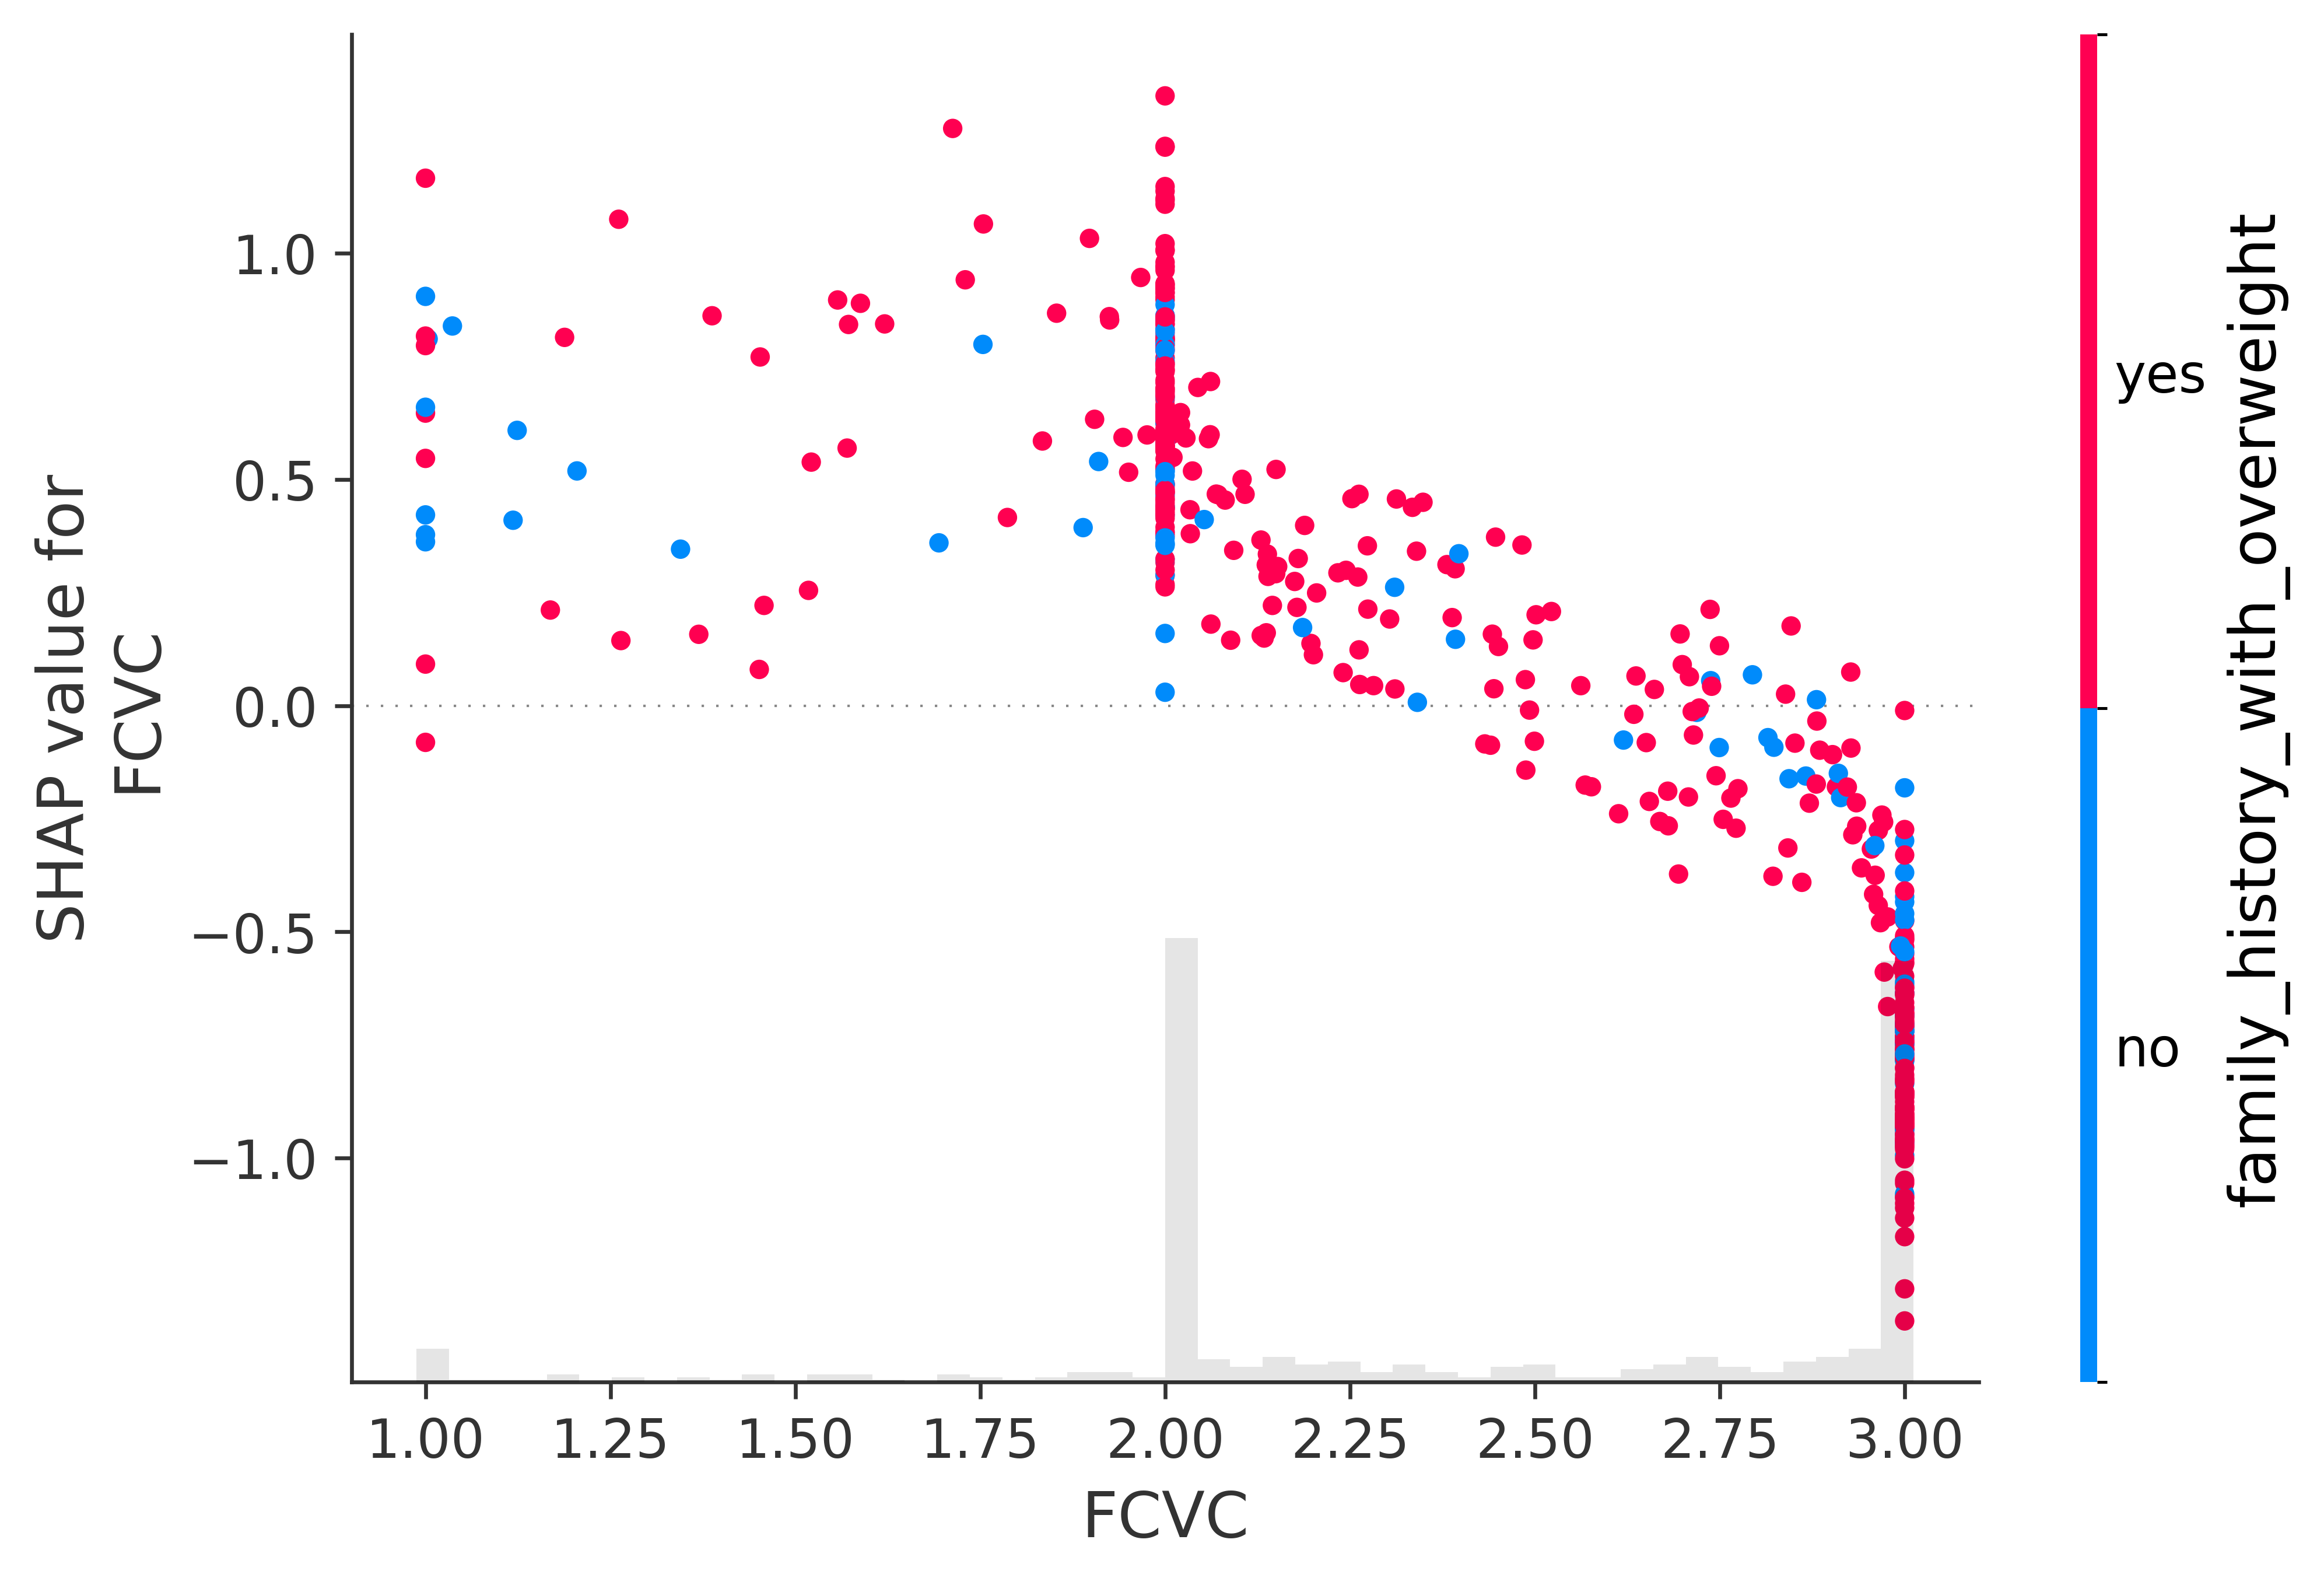

In [ ]:
# 1. 클래스 인덱스 찾기
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_I")

# 2. Obesity_Type_I 전용 SHAP 객체 생성
shap_values_ob1 = shap.Explanation(
    values=shap_values.values[:,:,idx],       # Obesity_Type_I 클래스 SHAP 값
    base_values=shap_values.base_values[:,idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# 3. Dependence plot (X축=FCVC, 색깔=family_history_with_overweight)
shap.plots.scatter(
    shap_values_ob1[:, "FCVC"],
    color=shap_values_ob1[:, "family_history_with_overweight"]
)

<Figure size 3840x2880 with 0 Axes>

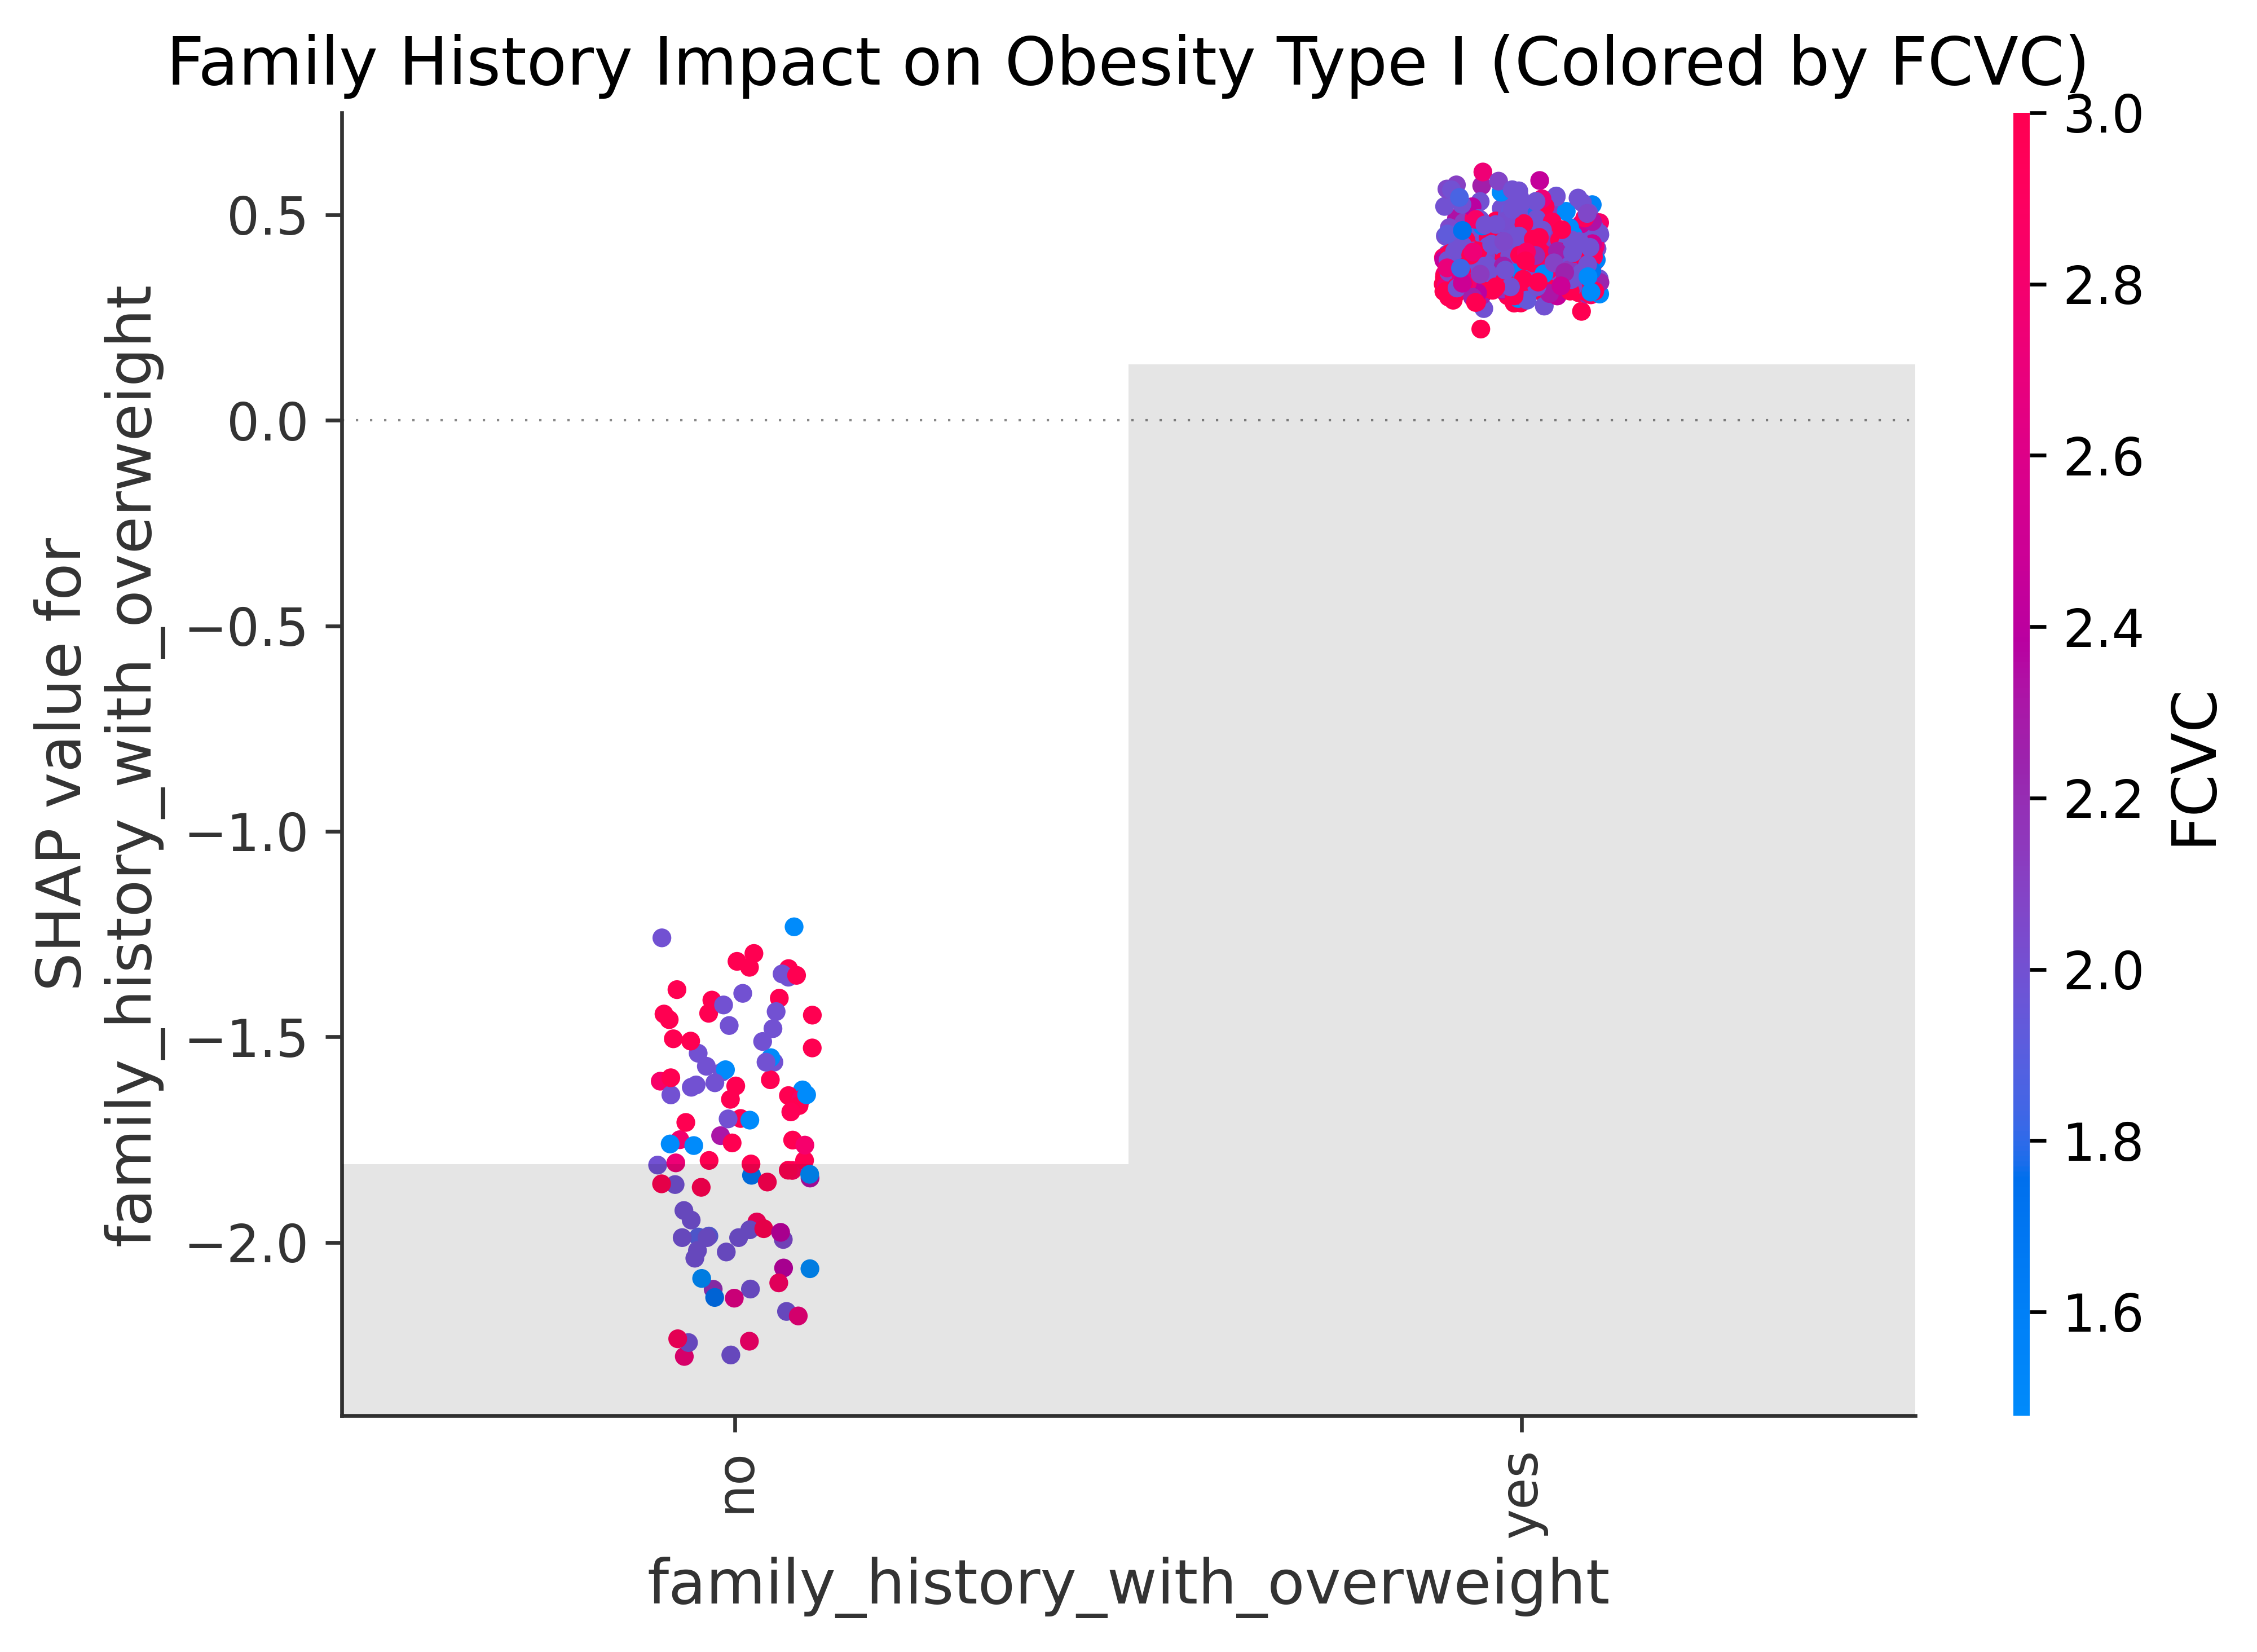

<Figure size 3600x2400 with 0 Axes>

In [ ]:
# 1. 클래스 인덱스 찾기
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_I")

# 2. Obesity_Type_I 전용 SHAP 객체 생성
shap_values_ob1 = shap.Explanation(
    values=shap_values.values[:,:,idx],       # Obesity_Type_I 클래스 SHAP 값
    base_values=shap_values.base_values[:,idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)
plt.figure(dpi=600)

# 3. Dependence plot (X축=family_history_with_overweight, 색깔=FCVC)
shap.plots.scatter(
    shap_values_ob1[:, "family_history_with_overweight"],
    color=shap_values_ob1[:, "FCVC"],
    show=False
)
plt.title("Family History Impact on Obesity Type I (Colored by FCVC)", fontsize=14)
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()

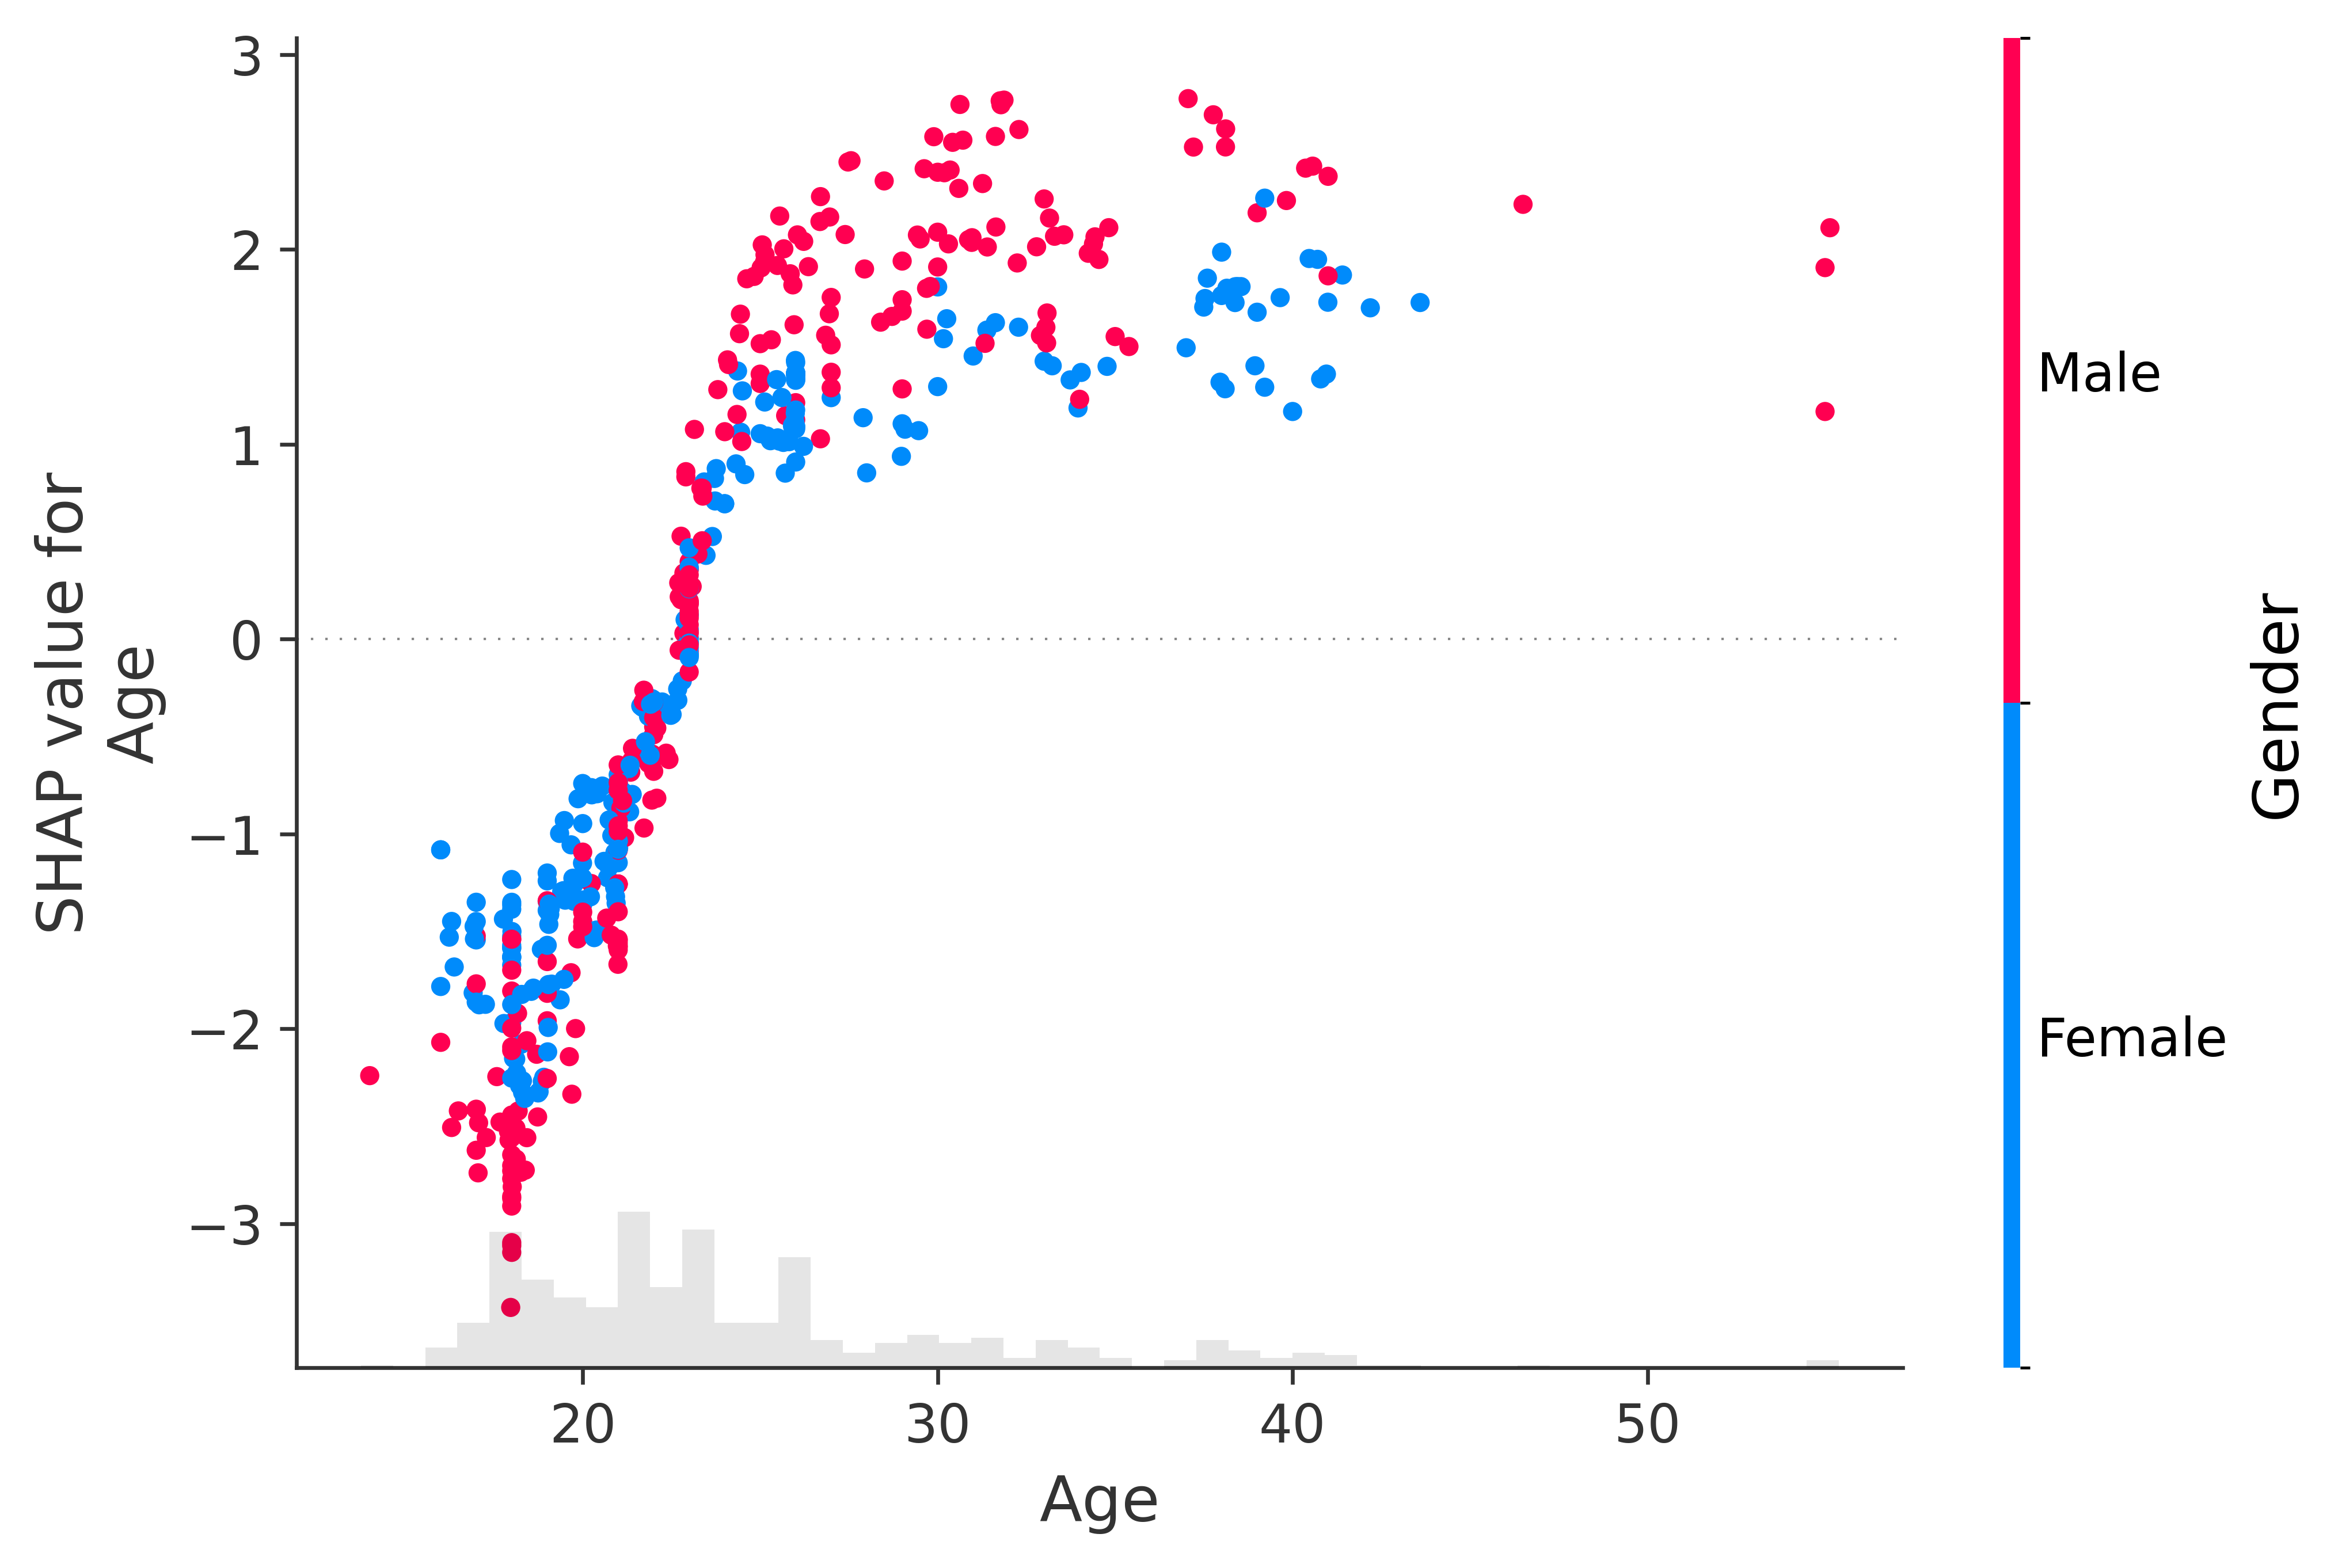

In [ ]:
# 1. 클래스 인덱스 찾기
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_II")

# 2. Obesity_Type_I 전용 SHAP 객체 생성
shap_values_ob1 = shap.Explanation(
    values=shap_values.values[:,:,idx],       # Obesity_Type_I 클래스 SHAP 값
    base_values=shap_values.base_values[:,idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# 3. Dependence plot (X축=Age, 색깔=Gender)
shap.plots.scatter(
    shap_values_ob1[:, "Age"],
    color=shap_values_ob1[:, "Gender"]
)

<Figure size 3840x2880 with 0 Axes>

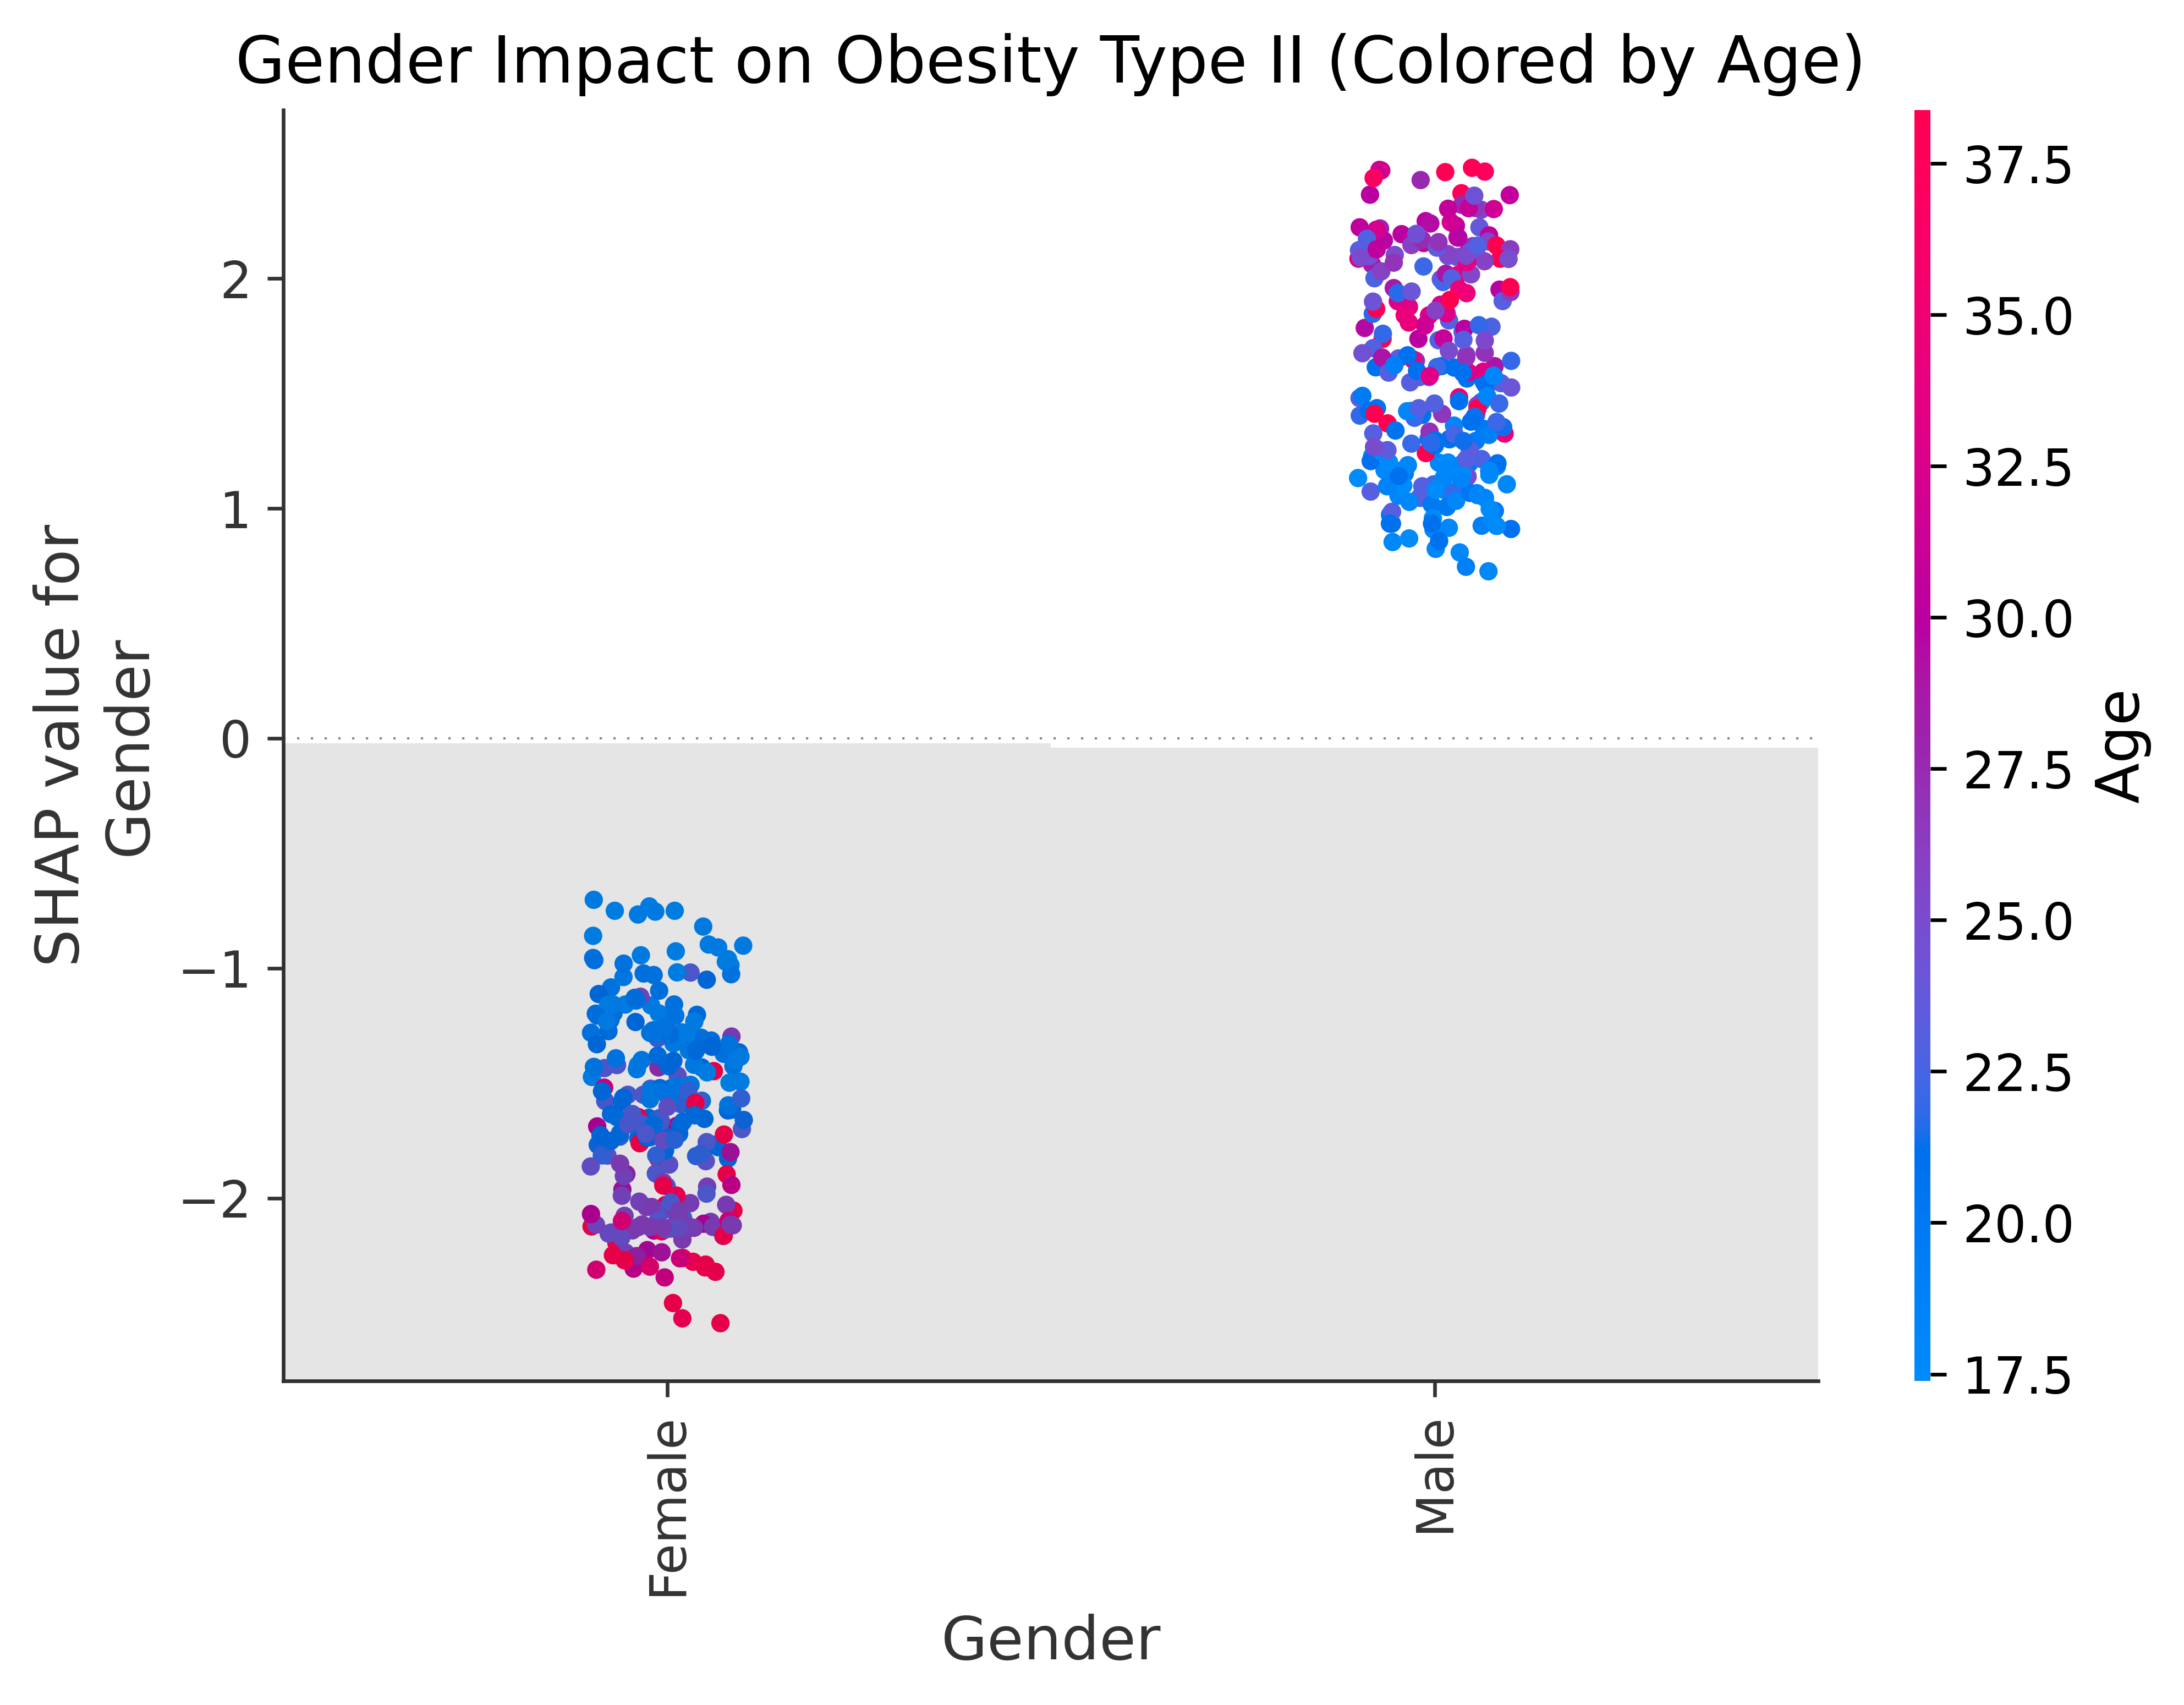

<Figure size 3600x2400 with 0 Axes>

In [ ]:
# 1. 클래스 인덱스 찾기
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_II")

# 2. Obesity_Type_II 전용 SHAP 객체 생성
shap_values_ob2 = shap.Explanation(
    values=shap_values.values[:, :, idx],
    base_values=shap_values.base_values[:, idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)
plt.figure(dpi=600)
shap.plots.scatter(
    shap_values_ob2[:, "Gender"],
    color=shap_values_ob2[:, "Age"],
    show=False
)
plt.title("Gender Impact on Obesity Type II (Colored by Age)", fontsize=14)
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()

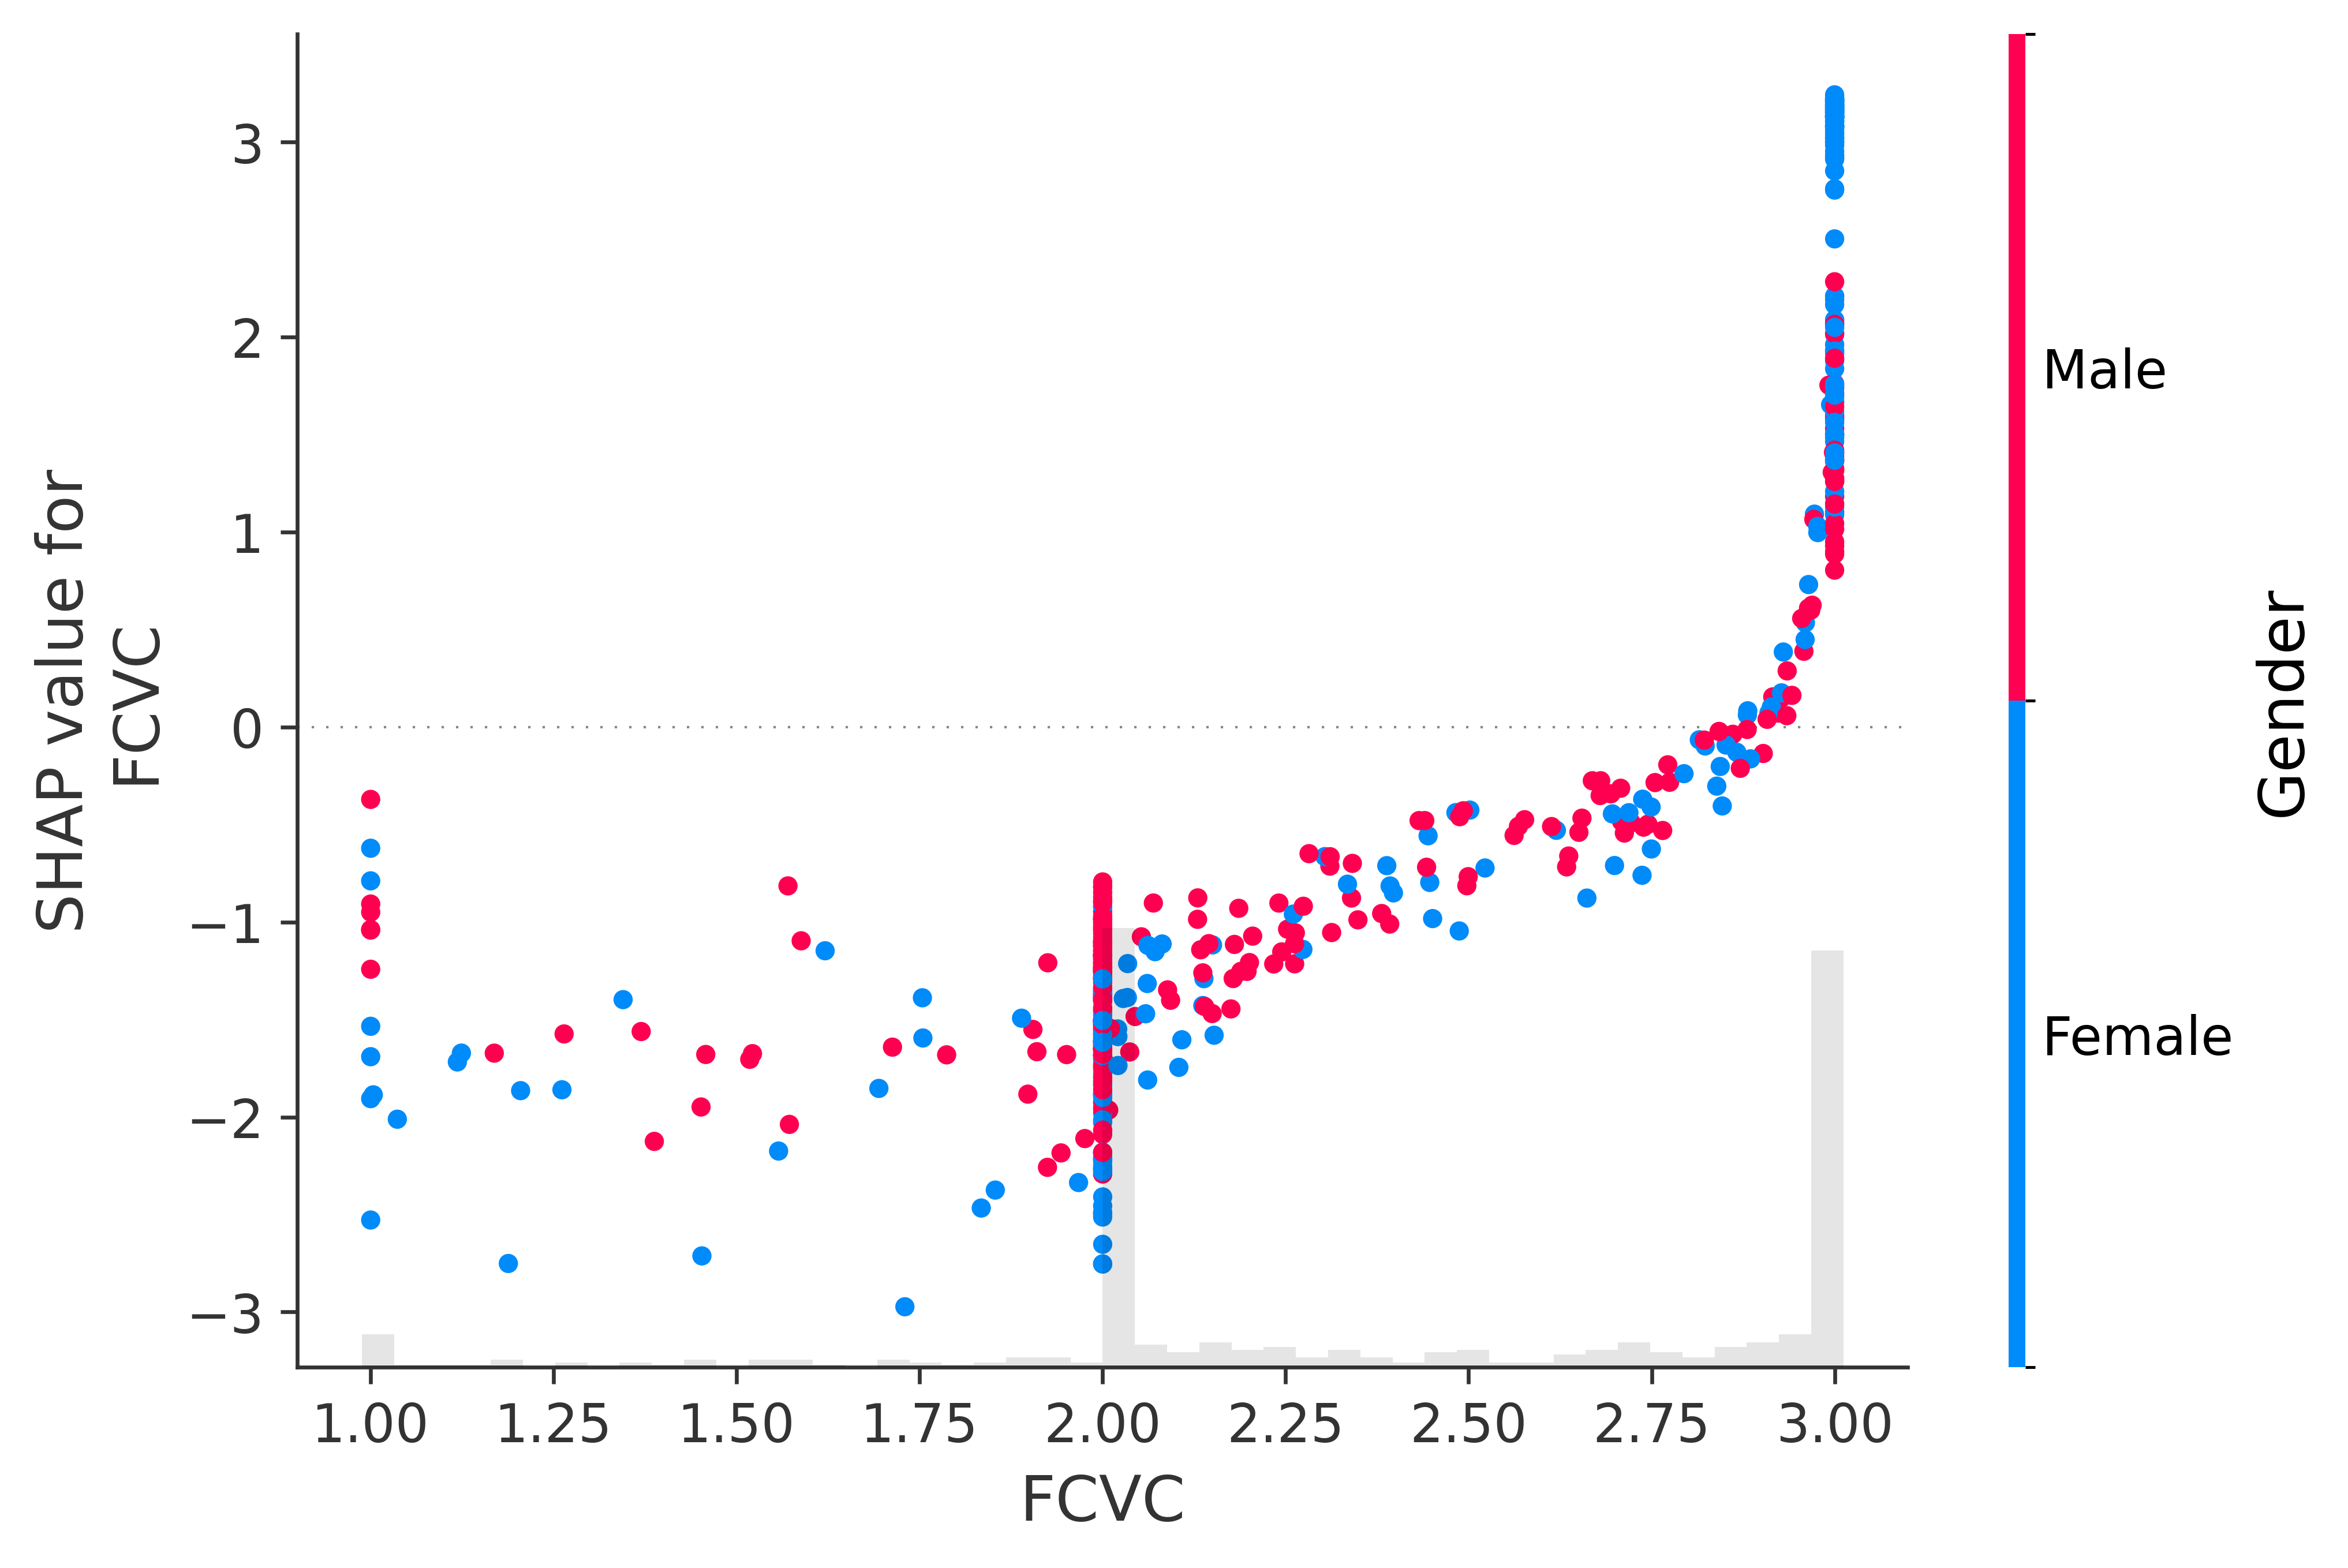

In [ ]:
# 1. 클래스 인덱스 찾기
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_III")

# 2. Obesity_Type_I 전용 SHAP 객체 생성
shap_values_ob1 = shap.Explanation(
    values=shap_values.values[:,:,idx],       # Obesity_Type_I 클래스 SHAP 값
    base_values=shap_values.base_values[:,idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# 3. Dependence plot (X축=FCVC, 색깔=Gender)
shap.plots.scatter(
    shap_values_ob1[:, "FCVC"],
    color=shap_values_ob1[:, "Gender"]
)

<Figure size 3840x2880 with 0 Axes>

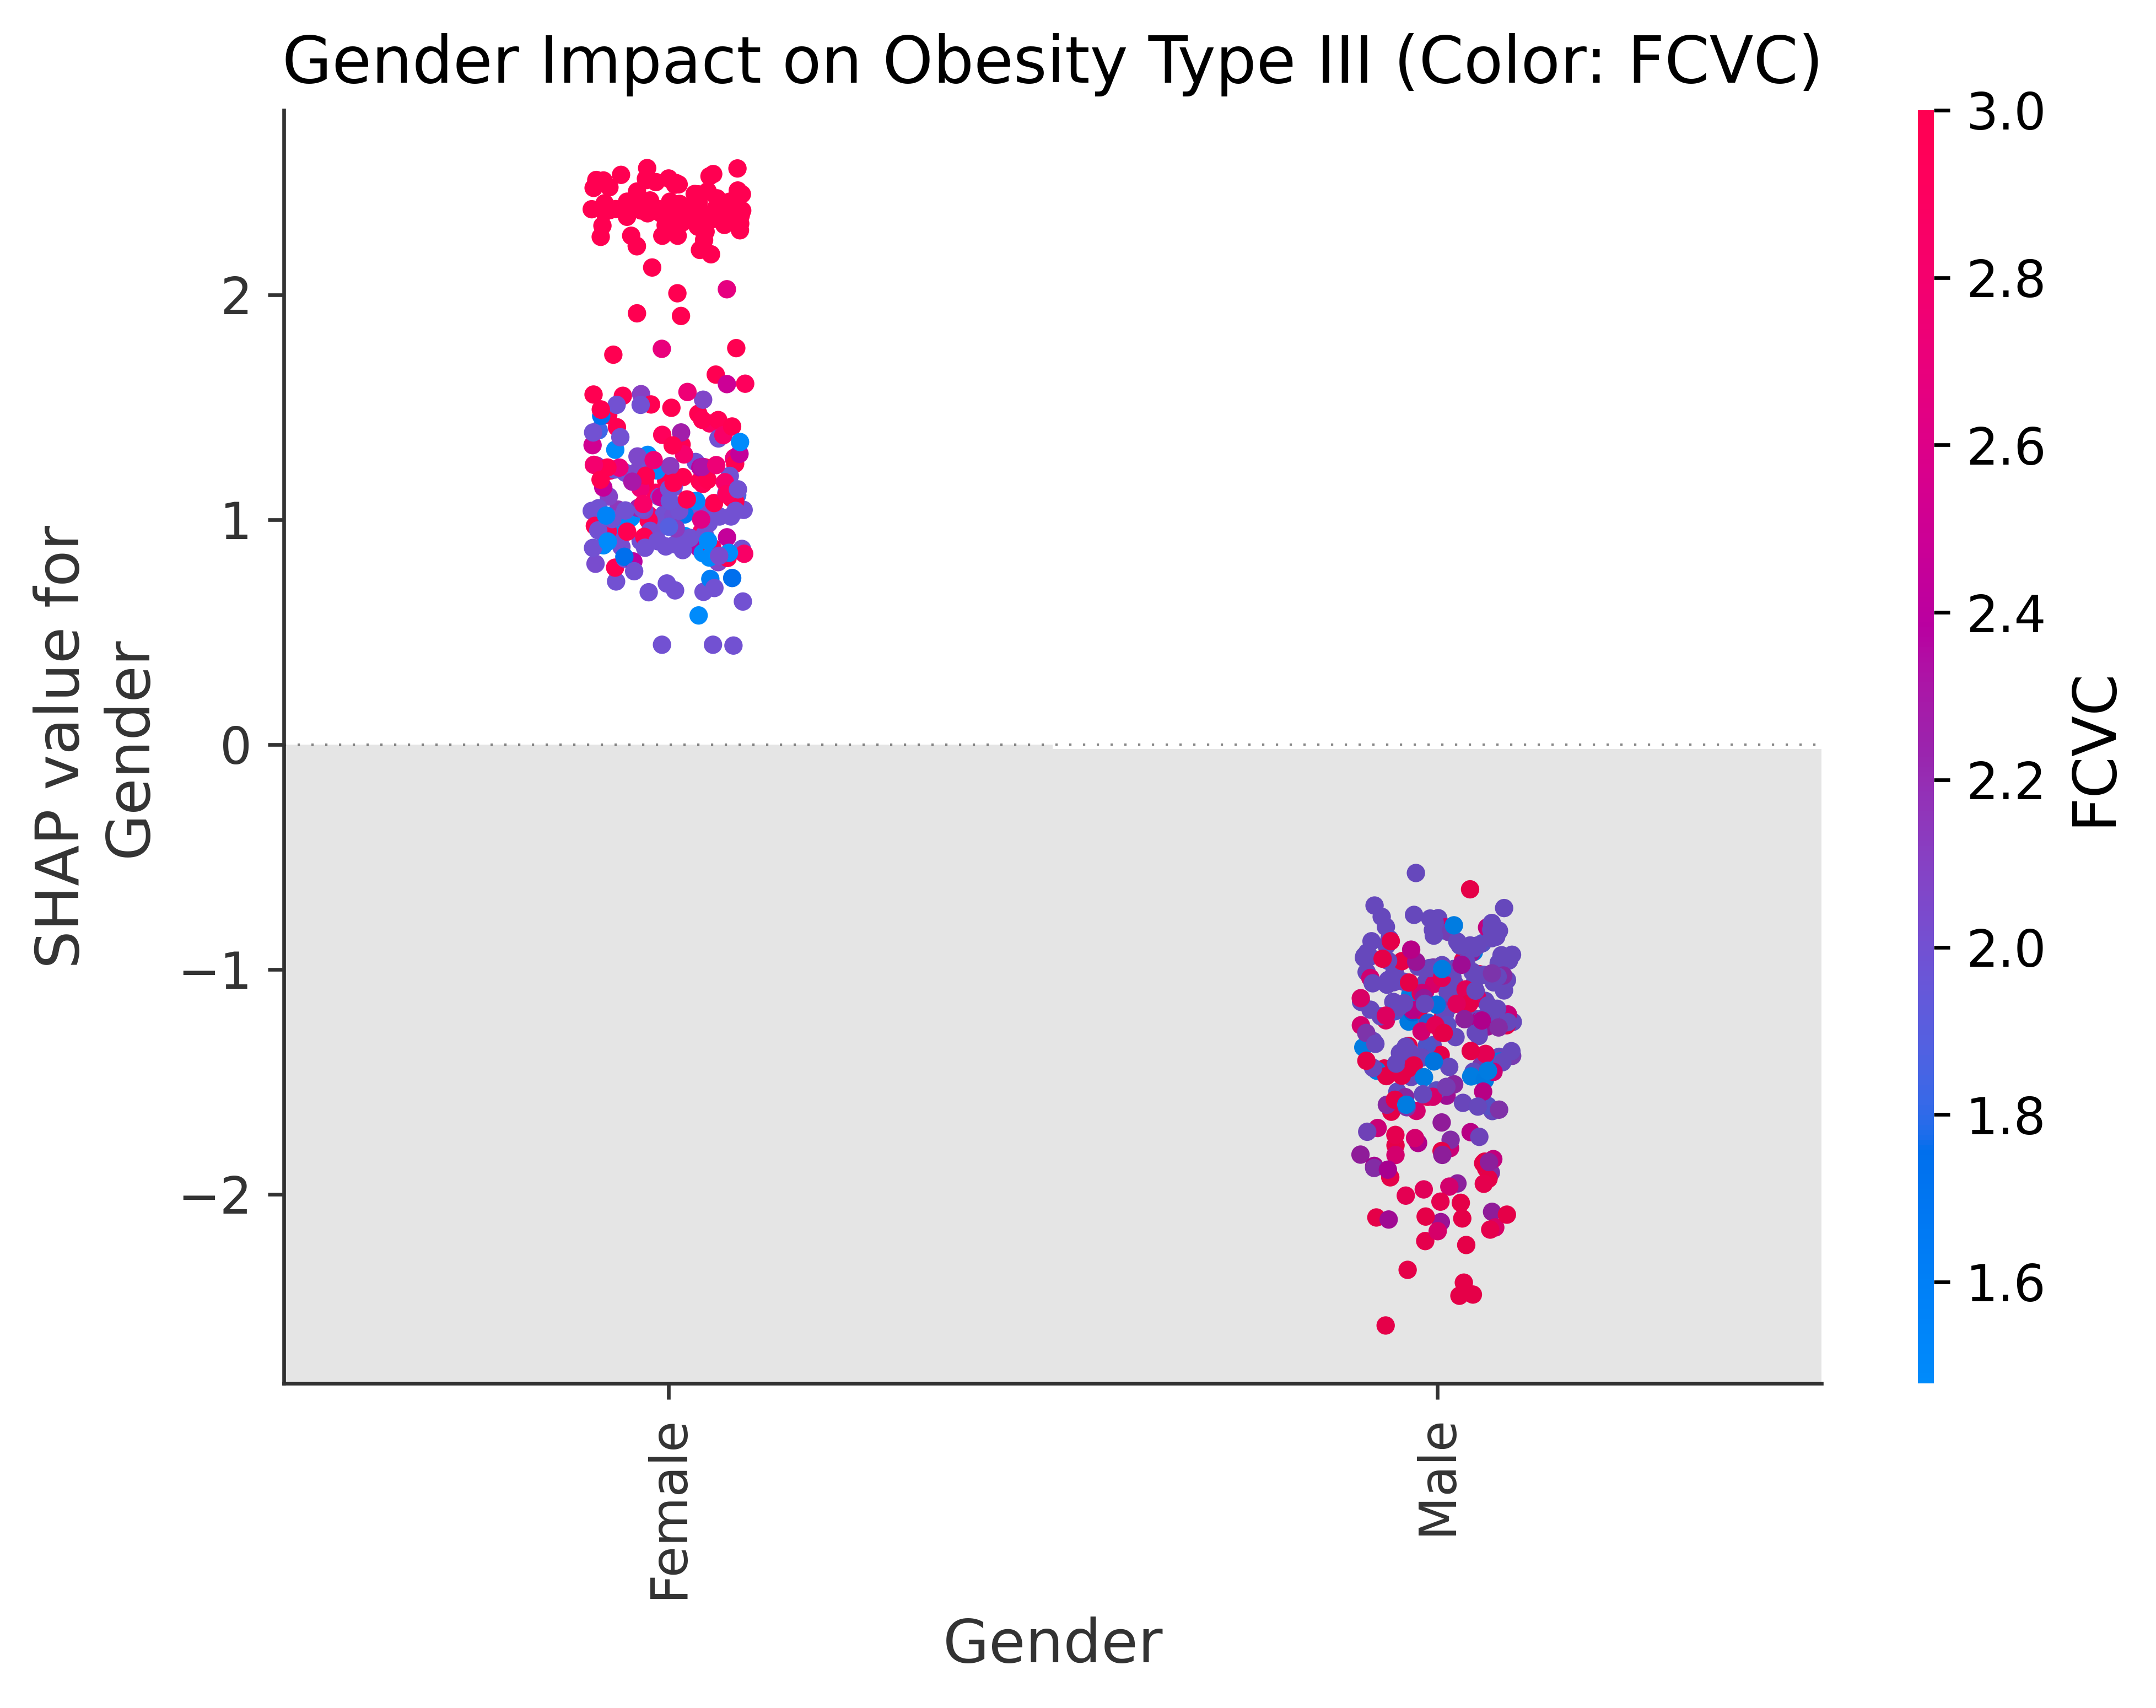

<Figure size 3600x2400 with 0 Axes>

In [ ]:
# 1) 클래스 인덱스
classes = sorted(y_train.unique())
idx = classes.index("Obesity_Type_III")

# 2) Obesity_Type_III 전용 SHAP 객체 (변수명 일관!)
shap_values_ob1 = shap.Explanation(
    values=shap_values.values[:, :, idx],
    base_values=shap_values.base_values[:, idx],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# 3) Dependence plot (X=Gender, Color=FCVC) + 제목
plt.figure(dpi=600)
shap.plots.scatter(
    shap_values_ob1[:, "Gender"],
    color=shap_values_ob1[:, "FCVC"],
    show=False
)
plt.title("Gender Impact on Obesity Type III (Color: FCVC)", fontsize=14)
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()